# Run this csv read if have access to Final_Data.csv

In [157]:
import pandas as pd
df = pd.read_csv('Final_Data.csv')
df = df.rename({'avg sentiment': 'COVID_sentiment'}, axis='columns')
df = df.rename({'Average Sentiment': 'Average_Comment_Score'}, axis='columns')

# Run from here to reproduce results with publicly available data- where the analysis title it labelled "(Can be run with usable_data.csv)" means it can be executed with this dataset

In [116]:
df = pd.read_csv('usable_data.csv')

In [158]:
df = df[df['Company'] != 'Lexus']

In [159]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [119]:
# mapping names of companies to tickers used in subsequent chapters.
name_to_ticker = {
    "Caterpillar": "CAT",
    "Visa": "V",
    "Google": "GOOG",
    "Bank of America": "BAC",
    "UBS Group": "UBS",
    "Amazon": "AMZN",
    "Wells Fargo": "WFC",
    "HP Inc.": "HPQ",
    "Honda": "HMC",
    "Danone": "DANOY",
    "Disney": "DIS",
    "Walmart": "WMT",
    "UPS": "UPS",
    "SAP": "SAP",
    "Apple": "AAPL",
    "General Motors": "GM",
    "AT&T": "T",
    "Ford": "F",
    "Citigroup": "C",
    "Coke": "KO",
    "Siemens": "SIE.DE",
    "Meta": "META",
    "JPMorgan": "JPM",
    "AXA": "CS.PA",
    "Intel": "INTC",
    "Volkswagen": "VOW.DE",
    "Nintendo": "NTDOY",
    "FedEx": "FDX",
    "Cisco": "CSCO",
    "Fox Corporation": "FOX",
    "Costco": "COST",
    "CVS Health": "CVS",
    "Netflix": "NFLX",
    "Microsoft": "MSFT",
    "Home Depot": "HD",
    "Mcdonalds": "MCD",
    "T-Mobile US": "TMUS",
    "Nestle": "NESN.SW",
    "Dell": "DELL",
    "Hyundai Motor Company": "HYMTF",
    "Yum! Brands": "YUM",
    "Starbucks": "SBUX",
    "John Deere": "DE",
    "Kering": "KER.PA",
    "Toyota": "TM",
    "BMW": "BMW.DE",
    "Adidas": "ADDYY",
    "L'oreal": "LRLCF",
    "Philip Morris": "PM",
    "HSBC": "HSBC",
    "Sony": "SONY",
    "American Express": "AXP",
    "eBay": "EBAY",
    "PayPal": "PYPL",
    "Hermes": "RMS.PA",
    "Oracle": "ORCL",
    "Porsche": "POAHY",
    "IBM": "IBM",
    "Pepsi": "PEP",
    "Nike": "NKE",
    "Samsung": "SSNLF",
    "Restaurant Brands International": "QSR",
       'Allianz': "ALV.DE", 
    "Lowe's": "LOW", 
    'Verizon': 'VZ', 
    'Accenture': 'ACN', 
    'Goldman Sachs': 'GS', 
    'Budweiser': 'BUD', 
    'Banco Santander': 'BNC.L', 
    'Zara': 'IDEXF', 
    'General Electric': 'GE', 
    'Colgate-Palmolive': 'CL', 
    'Mastercard': 'MA', 
    'Adobe': 'ADBE', 
    'Heineken': "HEINY"

}


# The below sentiments can be used to create confidence measures in Black Litterman model

In [121]:
covid_sentiments = {'CAT': 0.03337610383477415, 'V': 0.2777259062949632, 'GOOG': 0.18894252496356065, 'BAC': 0.268260063971446, 'UBS': 0.16171929802756854, 'AMZN': 0.07284774202479405, 'WFC': 0.2509522357723578, 'HPQ': 0.16719678279829123, 'HMC': 0.010633045698608696, 'DANOY': 0.06476962809917358, 'DIS': 0.16077661035323904, 'WMT': 0.07517382657970655, 'UPS': 0.11689799233336935, 'SAP': 0.01866688281709134, 'AAPL': 0.08225932431130031, 'GM': 0.09430621717041332, 'T': 0.026750088269378983, 'F': 0.1435699911204209, 'C': -0.018130022375451325, 'KO': 0.3530683176746498, 'SIE.DE': 0.31588763566573075, 'META': 0.15419939499676974, 'JPM': 0.29922755399115214, 'CS.PA': 0.3252385640961475, 'INTC': 0.08512758185174432, 'VOW.DE': 0.12600572200077137, 'NTDOY': 0.1571954862746781, 'FDX': 0.12487507315775415, 'CSCO': 0.13313709110094873, 'FOX': -0.20595795624812646, 'COST': 0.1348655928585291, 'CVS': 0.15308051121438665, 'NFLX': 0.20768631666965282, 'MSFT': 0.25515385863267726, 'HD': 0.16966784263416695, 'MCD': 0.01445290296386519, 'TMUS': 0.33265835962145174, 'NESN.SW': 0.22673206774105437, 'DELL': 0.09323267762284143, 'HYMTF': 0.2537263334451529, 'YUM': 0.09989631976602509, 'SBUX': 0.23895273451984586, 'DE': 0.2035806358381504, 'KER.PA': 0.11709501115392436, 'TM': 0.16975018427518412, 'BMW.DE': 0.19126670691216408, 'ADDYY': 0.33325081256771383, 'LRLCF': 0.5276343373493976, 'PM': 0.20089951807228915, 'HSBC': 0.21175541401273873, 'SONY': 0.15297592482100228, 'AXP': 0.4571983909895422, 'EBAY': 0.2630987502366972, 'PYPL': 0.3428015081966962, 'RMS.PA': 0.2371901234567902, 'ORCL': 0.17685158730158734, 'POAHY': 0.38376412918108443, 'IBM': 0.1586316074188564, 'PEP': 0.14903375068045732, 'NKE': 0.13042863381160313, 'SSNLF': 0.20753761651131808, 'QSR': 0.04746971544715442}

In [8]:
print(covid_sentiments)

{'CAT': 0.03337610383477415, 'V': 0.2777259062949632, 'GOOG': 0.18894252496356065, 'BAC': 0.268260063971446, 'UBS': 0.16171929802756854, 'AMZN': 0.07284774202479405, 'WFC': 0.2509522357723578, 'HPQ': 0.16719678279829123, 'HMC': 0.010633045698608696, 'DANOY': 0.06476962809917358, 'DIS': 0.16077661035323904, 'WMT': 0.07517382657970655, 'UPS': 0.11689799233336935, 'SAP': 0.01866688281709134, 'AAPL': 0.08225932431130031, 'GM': 0.09430621717041332, 'T': 0.026750088269378983, 'F': 0.1435699911204209, 'C': -0.018130022375451325, 'KO': 0.3530683176746498, 'SIE.DE': 0.31588763566573075, 'META': 0.15419939499676974, 'JPM': 0.29922755399115214, 'CS.PA': 0.3252385640961475, 'INTC': 0.08512758185174432, 'VOW.DE': 0.12600572200077137, 'NTDOY': 0.1571954862746781, 'FDX': 0.12487507315775415, 'CSCO': 0.13313709110094873, 'FOX': -0.20595795624812646, 'COST': 0.1348655928585291, 'CVS': 0.15308051121438665, 'NFLX': 0.20768631666965282, 'MSFT': 0.25515385863267726, 'HD': 0.16966784263416695, 'MCD': 0.0144

In [122]:
esg_sentiment = {'CAT': 0.03859252397015743,
 'V': -0.034142032020228745,
 'GOOG': 0.11861185218352398,
 'BAC': 0.048691160097822275,
 'UBS': 0.0570818303161573,
 'AMZN': 0.04144041821758675,
 'WFC': 0.06657459349593488,
 'HPQ': -0.007300911579141919,
 'HMC': -0.0488217342291352,
 'DANOY': -0.007861673553719011,
 'DIS': -0.13810098924923914,
 'WMT': 0.04761192487259213,
 'UPS': -0.02880114356279597,
 'SAP': -0.051049289291822814,
 'AAPL': 0.058583445683533436,
 'GM': 0.01826577972961454,
 'T': -0.0023091886798579948,
 'F': -0.034630567317986465,
 'C': -0.0049056687519886686,
 'KO': 1,
 'SIE.DE': 0.17545821833575134,
 'META': 0.061299171989814195,
 'JPM': 0.154203370232132,
 'CS.PA': -0.0012226151727576951,
 'INTC': -0.056957676738239656,
 'VOW.DE': 0.07338876494792373,
 'NTDOY': -0.010808198792342998,
 'FDX': -0.022360747539238453,
 'CSCO': 0.024860332395357284,
 'FOX': -0.1624569074018543,
 'COST': -0.004036503007956308,
 'CVS': -0.13937857142856921,
 'NFLX': -0.05784096637400636,
 'MSFT': 0.050607091541135345,
 'HD': -0.048802159503955105,
 'MCD': 0.00748578968737317,
 'TMUS': -0.17984206098843095,
 'NESN.SW': 0.022780442502049643,
 'DELL': 0.011362143094289555,
 'HYMTF': 0.04840169406239547,
 'YUM': -0.10567886912015323,
 'SBUX': 0.03445388394512601,
 'DE': 0.0,
 'KER.PA': -0.18569999999999723,
 'TM': 0.042217444717445395,
 'BMW.DE': -0.022568367038937342,
 'ADDYY': -0.034798483206934086,
 'LRLCF': 0.0,
 'PM': 0.0,
 'HSBC': 0.23357261146496786,
 'SONY': -0.08699982100238547,
 'AXP': -0.1270995575221213,
 'EBAY': 0.02082857413368675,
 'PYPL': -0.005901508196721316,
 'RMS.PA': -0.1856999999999989,
 'ORCL': -0.050897354497354684,
 'POAHY': 0.006107843137254801,
 'IBM': 0.16131004636785198,
 'PEP': 0.01932667392487776,
 'NKE': -0.03363418590143428,
 'SSNLF': 0.1760077230359518,
 'QSR': -0.08435833333333212}

In [123]:
ML_predictions = {'CAT': 0.025454285608248976, 'V': 0.016454245519850183, 'GOOG': 0.07608063503978937, 'BAC': 0.02652202690348761, 'UBS': 0.02652202690348761, 'AMZN': 0.016950938974232912, 'WFC': 0.08735215292220362, 'HPQ': 0.07608063503978937, 'HMC': 0.027778195591267346, 'DANOY': 0.02652202690348761, 'DIS': 0.015198076832070442, 'WMT': 0.02652202690348761, 'UPS': 0.025454285608248976, 'SAP': 0.07608063503978937, 'AAPL': 0.028274889045650075, 'GM': 0.08735215292220362, 'T': 0.02652202690348761, 'F': 0.07059594269463731, 'C': 0.02652202690348761, 'KO': 0.027778195591267346, 'SIE.DE': 0.02652202690348761, 'META': 0.07558394158540664, 'JPM': 0.028274889045650075, 'CS.PA': 0.07432777289762689, 'INTC': 0.07608063503978937, 'VOW.DE': 0.025454285608248976, 'NTDOY': 0.07558394158540664, 'FDX': 0.027778195591267346, 'CSCO': 0.07608063503978937, 'FOX': 0.02652202690348761, 'COST': 0.015201960013212336, 'CVS': 0.02652202690348761, 'NFLX': 0.016454245519850183, 'MSFT': -0.004062619376832094, 'HD': 0.022225465975691895, 'MCD': 0.022225465975691895, 'TMUS': 0.02652202690348761, 'NESN.SW': 0.028274889045650075, 'DELL': 0.028274889045650075, 'HYMTF': 0.027778195591267346, 'YUM': 0.028274889045650075, 'SBUX': 0.016950938974232912, 'DE': 0.027778195591267346, 'KER.PA': 0.08735215292220362, 'TM': 0.027778195591267346, 'BMW.DE': 0.028274889045650075, 'ADDYY': 0.016454245519850183, 'LRLCF': 0.07558394158540664, 'PM': 0.07432777289762689, 'HSBC': 0.027778195591267346, 'SONY': -0.025649210958904742, 'AXP': 0.028274889045650075, 'EBAY': 0.028274889045650075, 'PYPL': 0.07558394158540664, 'RMS.PA': 0.07558394158540664, 'ORCL': 0.028274889045650075, 'POAHY': 0.07432777289762689, 'IBM': 0.028274889045650075, 'PEP': 0.028274889045650075, 'NKE': 0.024967072005953442, 'SSNLF': 0.06574591798746426, 'QSR': 0.028274889045650075}

In [124]:
market_caps = {'BAC': 37312000000,
 'AMZN': 1670000000000,
 'WFC': 197110000000,
 'HPQ': 31140000000,
 'DANOY': 42730000000,
 'DIS': 321160000000,
 'WMT': 389440000000,
 'UPS': 159830000000,
 'SAP': 160920000000,
 'AAPL': 2360000000000,
 'GM': 85030000000,
 'T': 191140000000,
 'F': 60400000000,
 'C': 146640000000,
 'KO': 233620000000,
 'SIE.DE': 132110000000,
 'META': 947920000000,
 'JPM': 508640000000,
 'CS.PA': 66720000000,
 'INTC': 218310000000,
 'VOW.DE': 134270000000,
 'NTDOY': 56920000000,
 'FDX': 59360000000,
 'CSCO': 232310000000,
 'FOX': 23450000000,
 'COST': 199640000000,
 'CVS': 111330000000,
 'NFLX': 280010000000,
 'MSFT': 2220000000000,
 'HD': 352850000000,
 'MCD': 184980000000,
 'TMUS': 151280000000,
 'NESN.SW': 342500000000,
 'DELL': 80380000000,
 'HYMTF': 50150000000,
 'YUM': 36480000000,
 'SBUX': 131140000000,
 'DE': 106400000000,
 'KER.PA': 90000000000,
 'TM': 240410000000,
 'BMW.DE': 63490000000,
 'ADDYY': 61510000000,
 'LRLCF': 230270000000,
 'PM': 148610000000,
 'HSBC': 116680000000,
 'SONY': 133290000000,
 'AXP': 139140000000,
 'EBAY': 48790000000,
 'PYPL': 305580000000,
 'RMS.PA': 145260000000,
 'ORCL': 258030000000,
 'POAHY': 70000000000,
 'IBM': 104780000000,
 'PEP': 215730000000,
 'NKE': 241350000000,
 'SSNLF': 401880000000,
 'QSR': 23750000000,
 'CAT': 106840000000,
 'V': 505300000000,
 'GOOG': 1870000000000,
  "ALV.DE": 93140000000, 
"LOW": 142750000000, 
'VZ': 220420000000, 
'ACN': 205710000000, 
'GS': 132420000000, 
'BUD': 109920000000, 
'BNC.L': 67510000000, 
'IDEXF': 112950000000, 
  'GE': 114950000000, 
'CL': 63670000000, 
'MA': 350270000000, 
'ADBE': 274470000000, 
 "HEINY": 60500000000
}

In [125]:
df['Dates'] = pd.to_datetime(df['Dates'])

# Functions To Execute Strategies

## Sentiment to Confidence Measures for Black-Litterman Functions

In [126]:
def calculate_sentiment_confidence(return_view, sentiment_score, weight_factor):
    """
    Calculate a sentiment-based confidence score.

    The confidence is based on a combination of a default base value (0.75), the influence of the `return_view`,
    and the influence of the `sentiment_score`.

    Parameters:
    - return_view (float): Represents the investors view of an investment's return.
    - sentiment_score (float): The sentiment score relating to the asset the return_view is related to.
    - weight_factor (float): The weight given to adjust the influence of `return_view` and `sentiment_score`.

    Returns:
    - float: A confidence value between 0 and 1.
    """
    
    confidence = 0.75 - (return_view * weight_factor) + (sentiment_score * (weight_factor))
    return min(max(confidence, 0), 1.0)

def calculate_model_confidence(investor_expectation, model_prediction):
    """
    Calculate the confidence in the model based on the difference between the investor's expectation and the model's prediction.

    Parameters:
    - investor_expectation (float): The investor's expectation of the investment return.
    - model_prediction (float): The predicted value by the model.

    Returns:
    - float: A confidence value between 0 and 1.
    """
    
    difference = model_prediction - investor_expectation
    
    if difference > 0:
        confidence = min(0.75 + 0.1 * (difference / investor_expectation), 1.0)
    elif difference < 0:
        confidence = max(0.75 + 0.1 * (difference / investor_expectation), 0.0)
    else:
        confidence = 0.75
    
    return min(max(confidence, 0), 1)

## Random Forest Prediction Function

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def run_random_forest(features, day_prediction, n_estimators, max_depth, min_samples_split):
    
    '''
    This function applies the RandomForestClassifier on a given dataset, defined within the function by its date ranges, 
    to predict binary stock returns. The user provides features they're interested in, a prediction horizon in days, 
    and hyperparameters for the Random Forest.

    Parameters:
    - features: List of feature names the investor has selected.
    - day_prediction: Number of days into the future the investor wants to predict.
    - n_estimators: The number of trees in the forest.
    - max_depth: The maximum depth of the tree.
    - min_samples_split: The minimum number of samples required to split an internal node.

    Returns:
    - results: A dictionary of performance metrics on the test set.
    - best_model: The trained RandomForest model.
    - test_data: Data from the testing period.
    '''
    
    df['target'] = df[f'{day_prediction} Day Future Return'] > 0
    
    # Define the date ranges for training, validation, and testing
    train_start_date = pd.to_datetime('2019-01-01')
    train_end_date = pd.to_datetime('2021-05-14')
    val_start_date = pd.to_datetime('2021-05-15')
    val_end_date = pd.to_datetime('2021-07-15')
    test_start_date = pd.to_datetime('2021-07-17')
    test_end_date = pd.to_datetime('2021-11-30')
                  
    train_data = df[(df['Dates'] >= train_start_date) & (df['Dates'] <= train_end_date)].copy()
    val_data = df[(df['Dates'] >= val_start_date) & (df['Dates'] <= val_end_date)].copy()
    test_data = df[(df['Dates'] >= test_start_date) & (df['Dates'] <= test_end_date)].copy()

    best_model = RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, 
                                        min_samples_split=min_samples_split, 
                                        random_state=42)

    # Combine the training and validation data
    train_val_data = pd.concat([train_data, val_data])

    best_model.fit(train_val_data[features], train_val_data['target'])
    test_predictions = best_model.predict(test_data[features])
    test_probabilities = best_model.predict_proba(test_data[features])[:, 1]
    test_accuracy = accuracy_score(test_data['target'], test_predictions)
    test_precision = precision_score(test_data['target'], test_predictions)
    test_recall = recall_score(test_data['target'], test_predictions)
    test_f1_score = f1_score(test_data['target'], test_predictions)
    test_roc_auc = roc_auc_score(test_data['target'], test_probabilities)

    results = {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1_score,
        'roc_auc': test_roc_auc
    }
    
    return results, best_model, test_data

## RF Regressor Function To Formulate Views

In [128]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

def run_random_forest_regressor(features, df, target_column="30 Day Future Return", n_estimators=50, max_depth=9, min_samples_split=8):
    
    '''
    `run_random_forest_regressor` trains a RandomForestRegressor on a dataset within specified date ranges 
    to predict the future returns of stocks.

    Parameters:
    - features: List of feature names the user is interested in.
    - df: The dataframe containing the historical stock data.
    - target_column: The column in the dataframe representing the future return. Default is "30 Day Future Return".
    - n_estimators: The number of trees in the forest. Default is 50.
    - max_depth: The maximum depth of the tree. Default is 9.
    - min_samples_split: The minimum number of samples required to split an internal node. Default is 8.

    Returns:
    - results: A dictionary containing the mean squared error on the test set.
    - model: The trained RandomForestRegressor model.
    - test_data: Data from the testing period with added predictions.
    '''
    
    df['target'] = df[f'{target_column}'] > 0
    
    # Define the date ranges for training, validation, and testing
    train_start_date = pd.to_datetime('2019-01-01')
    train_end_date = pd.to_datetime('2021-05-14')
    val_start_date = pd.to_datetime('2021-05-15')
    val_end_date = pd.to_datetime('2021-07-15')
    test_start_date = pd.to_datetime('2021-07-17')
    test_end_date = pd.to_datetime('2021-11-30')

    # Filter data based on the defined ranges
    train_data = df[(df['Dates'] >= train_start_date) & (df['Dates'] <= train_end_date)].copy()
    val_data = df[(df['Dates'] >= val_start_date) & (df['Dates'] <= val_end_date)].copy()
    test_data = df[(df['Dates'] >= test_start_date) & (df['Dates'] <= test_end_date)].copy()

    # Initialize and train the RandomForestRegressor
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                                  min_samples_split=min_samples_split, random_state=42)

    train_val_data = pd.concat([train_data, val_data])
    model.fit(train_val_data[features], train_val_data[target_column])

    # Predict on the test set
    test_predictions = model.predict(test_data[features])
    test_data['predicted_return'] = test_predictions  

    # Evaluate the Regression Model
    mse = mean_squared_error(test_data[target_column], test_predictions)
    results = {
        'mean_squared_error': mse
    }
    
    return results, model, test_data

def get_view_on_date(df, target_date):
    
    '''
    `get_view_on_date` retrieves predictions/views on a specified date from a given dataframe. 
    If no data exists for the provided date, the function will keep moving backward in time 
    until it finds the data.

    Parameters:
    - df: The dataframe containing the historical stock data and predictions.
    - target_date: The desired date for which to retrieve the predictions.

    Returns:
    - A dictionary containing ticker symbols as keys and the associated predicted return as values.
      If no data is found before the specified date, it returns an empty dictionary.
    '''
    
    current_date = target_date
    while current_date >= df['Dates'].min():
        filtered_data = df[df['Dates'] == current_date]
        if not filtered_data.empty:
            return {name_to_ticker[ticker]: filtered_data[filtered_data['Company'] == ticker]['predicted_return'].values[0] 
                    for ticker in filtered_data['Company'].unique()}
        current_date -= timedelta(days=1)
    print(f"No data found before {target_date}")
    return {}

## Random Forest Prediction Function Tests

In [129]:
financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
features = financial_features + covid_features

In [130]:
import unittest

class TestRandomForest(unittest.TestCase):
    
    '''
    `TestRandomForest` class tests the outputs of the `run_random_forest` function to ensure the validity of the results.

    Each method within this class is designed to test a specific performance metric outputted by the function, ensuring 
    they all lie within the valid range of [0, 1]. These metrics are accuracy, precision, recall, f1_score, and roc_auc.
    '''
    

    def test_accuracy_range(self):
        results, _, _ = run_random_forest(features, 30, 50, 9, 8)
        self.assertTrue(0 <= results['accuracy'] <= 1)

    def test_precision_range(self): 
        results, _, _ = run_random_forest(features, 30, 50, 9, 8)
        self.assertTrue(0 <= results['precision'] <= 1)
    
    def test_recall_range(self):
        results, _, _ = run_random_forest(features, 30, 50, 9, 8)
        self.assertTrue(0 <= results['recall'] <= 1)

    def test_f1_score_range(self):
        results, _, _ = run_random_forest(features, 30, 50, 9, 8)
        self.assertTrue(0 <= results['f1_score'] <= 1)

    def test_roc_auc_range(self):
        results, _, _ = run_random_forest(features, 30, 50, 9, 8)
        self.assertTrue(0 <= results['roc_auc'] <= 1)

In [131]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestRandomForest)
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)


test_accuracy_range (__main__.TestRandomForest) ... ok
test_f1_score_range (__main__.TestRandomForest) ... ok
test_precision_range (__main__.TestRandomForest) ... ok
test_recall_range (__main__.TestRandomForest) ... ok
test_roc_auc_range (__main__.TestRandomForest) ... ok

----------------------------------------------------------------------
Ran 5 tests in 7.147s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Fetch Probabilities Associated With Positive Return Predictions Function

In [132]:
from datetime import timedelta
import pandas as pd

def rank_predicted_companies(model, df, features, specific_date):
    """
    Get companies predicted to increase over a 15-day period ending on the specified date.
    
    Parameters:
    - df: DataFrame containing the data.
    - best_model: The trained RandomForest model.
    - features: List of features used for prediction.
    - specific_date: End date for the 15-day period.
    
    Returns:
    - List of companies predicted to increase, along with the date and probability.
    """
    
    if df.empty:
        return []
    
    date_limit = specific_date - timedelta(days=15)

    companies = df['Company'].unique()

    predicted_companies = []

    for company in companies:
        temp_date = specific_date
        
        while temp_date >= date_limit:
            filtered_data = df[(df['Dates'] == temp_date) & (df['Company'] == company)]

            if not filtered_data.empty:
  
                prediction = model.predict(filtered_data[features])
                probability = model.predict_proba(filtered_data[features])[:, 1]
      

                if prediction[0] == 1:
                    predicted_companies.append((company, temp_date, probability[0]))
                break
            

            temp_date -= timedelta(days=1)

    # Sort companies by probability
    predicted_companies.sort(key=lambda x: x[2], reverse=True)

    return predicted_companies

## Unit Tests For Prediction Probability Function 

In [133]:
class TestPredictCompanies(unittest.TestCase):
    
    '''
    The `TestPredictCompanies` class is designed to validate the functionality of functions related to company prediction
    based on a given dataset.

    This class sets up a sample dataframe with companies 'A' and 'B' with associated features and target values.
    A RandomForestClassifier model is trained on this data during the setUp step, and this trained model is used 
    to test different scenarios in the methods.

    Each test method in this class is designed to validate different aspects of company prediction functions.
    '''

    def setUp(self):

        self.df = pd.DataFrame({
            'Company': ['A', 'A', 'B', 'B'],
            'Dates': pd.to_datetime(['2021-10-01', '2021-10-02', '2021-10-01', '2021-10-02']),
            'Feature1': [1, 2, 3, 4],
            'Feature2': [5, 6, 7, 8],
            'target': [1, 0, 1, 1]
        })
        self.features = ['Feature1', 'Feature2']
        self.model = RandomForestClassifier(random_state=42)
        self.model.fit(self.df[self.features], self.df['target'])


    def test_basic_ranking_functionality(self):
        
        '''
        Test if the rank_predicted_companies function can correctly rank companies based on the model's predictions.
        '''
        
        predictions = rank_predicted_companies(self.model, self.df, self.features, pd.to_datetime('2021-10-02'))

        stripped_predictions = [(company, date) for company, date, _ in predictions]
    
        self.assertEqual(stripped_predictions, [('B', pd.to_datetime('2021-10-02'))])

    def test_empty_dataframe(self):
        
        '''
        Test if the predict_companies function returns an empty list when provided with an empty dataframe.
        '''
        
        predictions = rank_predicted_companies(self.model, pd.DataFrame(), self.features, pd.to_datetime('2021-10-02'))
        self.assertEqual(predictions, [])

    def test_date_outside_range(self):
        
        '''
        Test if the predict_companies function returns an empty list when the date specified is outside the range of dates in the dataframe.
        '''
        
        predictions = rank_predicted_companies(self.model, self.df, self.features, pd.to_datetime('2021-12-31'))
        self.assertEqual(predictions, [])

In [134]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestPredictCompanies)
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)


test_basic_ranking_functionality (__main__.TestPredictCompanies)
Test if the rank_predicted_companies function can correctly rank companies based on the model's predictions. ... ok
test_date_outside_range (__main__.TestPredictCompanies)
Test if the predict_companies function returns an empty list when the date specified is outside the range of dates in the dataframe. ... ok
test_empty_dataframe (__main__.TestPredictCompanies)
Test if the predict_companies function returns an empty list when provided with an empty dataframe. ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.264s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Regression Unit Test For Probability Predictions Using COVID 30 day  

In [135]:
class TestPredictedCompanies(unittest.TestCase):
    
    '''
    The `TestPredictedCompanies` class is designed to test the function `rank_predicted_companies` that ranks 
    companies based on certain features and predictions.

    In the setup step, features related to financial metrics and the impact of COVID are combined, and a RandomForest 
    model is trained using the `run_random_forest` function. A specific date for testing and a list of expected 
    top 10 companies are also defined.

    The sole test method in this class checks if the top 10 companies predicted by the model match the expected 
    top 10 companies for a specific date.
    '''
    
    def setUp(self):
        financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

        covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
        self.features = financial_features + covid_features
        _, self.trained_model, self.test_data_set = run_random_forest(self.features, 30, 50, 9, 8)
        
        self.specific_date = pd.Timestamp('2021-10-15')
        
        self.expected_top_10 = ['Philip Morris', 'Bank of America', 'Google', 'Accenture', 'Costco', 'Coke',
                                'Microsoft', 'HP Inc.', 'Nintendo', 'L\'oreal']
        
    def test_top_10_predictions(self):
        predictions = rank_predicted_companies(self.trained_model, self.test_data_set, self.features, self.specific_date)
        top_10_predictions = predictions[:10]

        expected_companies_set = set(self.expected_top_10)  
        predicted_companies_set = {company for company, _, _ in top_10_predictions}

        self.assertSetEqual(expected_companies_set, predicted_companies_set)


In [136]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestPredictedCompanies)
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)


test_top_10_predictions (__main__.TestPredictedCompanies) ... ok

----------------------------------------------------------------------
Ran 1 test in 1.970s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Single-Factor Model Functions 

In [137]:
import pandas as pd
from statsmodels import api as sm
from datetime import datetime, timedelta

def get_latest_sentiment_within_window(group, sentiment, end_date, window_days=15):
    
    '''
    Returns the latest sentiment value for a company within a specified time window ending on "end_date".
    
    Parameters:
    - group: A dataframe containing data for a single company.
    - sentiment: The sentiment column to extract data from.
    - end_date: The last date of the time window.
    - window_days: The length of the time window.
    
    Returns:
    - Latest sentiment value within the window or None if no data exists.
    '''
    
    end_date = datetime.strptime(end_date, "%Y-%m-%d")  
    start_date = end_date - timedelta(days=window_days - 1)
    windowed_data = group[(group['Dates'] >= start_date) & (group['Dates'] <= end_date)]
    if not windowed_data.empty:
        return windowed_data[sentiment].iloc[-1]

    return None

def rank_companies_by_sentiment(data, sentiment, end_date, top_n=10):
    
    '''
    Ranks companies based on an expected return derived from the product of sentiment beta and the latest sentiment.
    
    Parameters:
    - data: A dataframe containing data for multiple companies.
    - sentiment: The sentiment column to be used.
    - end_date: The end date for the calculation.
    - top_n: The number of top companies to be considered.
    
    Returns:
    - A dictionary of companies and their expected returns.
    '''
    
    filtered_data = data[data['Dates'] <= end_date]
    results = {}
    for company, group in filtered_data.groupby('Company'):
        X = group[sentiment]
        Y = group['30 Day Future Return']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        beta_sentiment = model.params[sentiment]
        latest_sentiment = get_latest_sentiment_within_window(group, sentiment, end_date)
        results[company] = {'beta_sentiment': beta_sentiment, 'latest_sentiment': latest_sentiment}
    beta_df = pd.DataFrame(results).T.dropna()
    beta_df['expected_return'] = beta_df['beta_sentiment'] * beta_df['latest_sentiment']
    
    beta_df = beta_df.sort_values(by='expected_return', ascending=False).head(top_n)['expected_return'].to_dict()
    
    views = {name_to_ticker[company]: beta_df[company] for company in beta_df.keys()}

    return views

## Unit  Tests For Getting Latest Sentiment and Ranking by Sentiment

In [138]:
import unittest
import pandas as pd

class TestSentimentFunctions(unittest.TestCase):
    
    '''
    The `TestSentimentFunctions` class provides unittests for the functions related to sentiment analysis 
    and its effect on the stock market.

    The setUp method creates a sample dataset that simulates sentiment scores and future returns for two 
    companies over a series of dates.

    The `test_get_latest_sentiment_within_window` method checks if the function accurately retrieves the latest 
    sentiment within a specified time window.

    The `test_rank_companies_by_sentiment` method ensures that companies are ranked correctly based on their 
    sentiment scores and corresponding expected returns.
    '''

    def setUp(self):
        self.sample_data = {
            'Dates': [datetime(2021, 9, 20), datetime(2021, 9, 25), datetime(2021, 10, 1), datetime(2021, 10, 5)],
            'Company': ['Apple', 'Apple', 'Microsoft', 'Microsoft'],
            'sentiment': [0.5, 0.6, 0.7, 0.8],
            '30 Day Future Return': [0.05, 0.06, 0.07, 0.08]
        }
        self.sample_df = pd.DataFrame(self.sample_data)

    def test_get_latest_sentiment_within_window(self):
        group_A = self.sample_df.groupby('Company').get_group('Apple')
        group_B = self.sample_df.groupby('Company').get_group('Microsoft')


        result_A = get_latest_sentiment_within_window(group_A, 'sentiment', '2021-10-01')
        self.assertEqual(result_A, 0.6) 

        # Test for Company B
        result_B = get_latest_sentiment_within_window(group_B, 'sentiment', '2021-10-01')
        self.assertEqual(result_B, 0.7)  

        # Test for a non-existent window
        result_empty = get_latest_sentiment_within_window(group_A, 'sentiment', '2021-09-10')
        self.assertIsNone(result_empty)  

    def test_rank_companies_by_sentiment(self):
        result = rank_companies_by_sentiment(self.sample_df, 'sentiment', '2021-10-05')
        highest_expected_return_ticker = max(result, key=result.get)

        # Check if the company with the highest expected return is 'MSFT'
        self.assertEqual(highest_expected_return_ticker, 'MSFT')

        # Test if it returns the correct number of top companies 
        self.assertEqual(len(result), 2)  
        

# Fetching prices function

In [139]:
def fetch_price_data(tickers, start_date, end_date):
    
    '''
    Fetches the historical adjusted closing prices for a list of stock tickers over a specified date range.

    Args:
        tickers (list): List of stock ticker symbols.
        start_date (str): The start of the date range in the format "YYYY-MM-DD".
        end_date (str): The end of the date range in the format "YYYY-MM-DD".

    Returns:
        dict: A dictionary with tickers as keys and their historical adjusted close prices as values.
    '''
    
    prices = {}
    for ticker in tickers:
        historical_price_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        prices[ticker] = historical_price_data['Adj Close']
    return prices

## Unit Test for Fetching Prices from Yahoo Finance

In [140]:
import unittest
from unittest.mock import patch
import yfinance as yf

class TestFetchPriceData(unittest.TestCase):
    
    '''
    The `TestFetchPriceData` class tests the function `fetch_price_data` which interacts with the `yfinance` 
    library to fetch adjusted close prices for given stock tickers over a specified date range.

    The test, `test_fetch_price_data`, sets up a scenario where the `yfinance.download` 
    is expected to return a set adjusted close prices for the ticker 'AAPL'. 
    It then tests if `fetch_price_data` correctly processes this mocked response.
    '''

    @patch.object(yf, 'download')
    def test_fetch_price_data(self, mock_download):
        # Mocking the return value of yf.download for a given ticker and date range
        mock_data = {
            'Adj Close': [100, 101, 102]
        }
        
        mock_download.return_value = mock_data

        tickers = ['AAPL']
        start_date = '2022-01-01'
        end_date = '2022-01-03'
        expected_output = {
            'AAPL': [100, 101, 102]
        }

        result = fetch_price_data(tickers, start_date, end_date)

        self.assertEqual(result, expected_output)


In [141]:
suite1 = unittest.TestLoader().loadTestsFromTestCase(TestFetchPriceData)
suite2 = unittest.TestLoader().loadTestsFromTestCase(TestSentimentFunctions)

# Combine the test suites
all_tests = unittest.TestSuite([suite1, suite2])   

runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)

test_fetch_price_data (__main__.TestFetchPriceData) ... ok
test_get_latest_sentiment_within_window (__main__.TestSentimentFunctions) ... ok
test_rank_companies_by_sentiment (__main__.TestSentimentFunctions) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.037s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Black-Litterman Optimisation Functions

In [142]:
import yfinance as yf
import numpy as np
from pypfopt import EfficientFrontier, BlackLittermanModel, risk_models, market_implied_risk_aversion, market_implied_prior_returns


def optimize_portfolio(tickers, market_caps, views, top_n=10):
    '''
    Constructs an optimal portfolio using Black-Litterman model considering investor views on expected 
    returns for specific assets.

    Args:
        tickers (list): List of stock ticker symbols.
        market_caps (dict): A dictionary of market capitalisations for the tickers.
        views (dict): Investor's views on expected returns.
        top_n (int, optional): Number of top views to consider. Defaults to 10.

    Returns:
        dict: Optimal portfolio weights that maximize the Sharpe ratio.
    '''
    # Ensure views are in the form of a dictionary
    if not isinstance(views, dict):
        raise ValueError("Expected views as a dictionary of ticker: view format.")

    # Retrieve relevant data
    prices = fetch_price_data(tickers, datetime(2017, 10, 15), datetime(2021, 10, 15))
    market_data = yf.download("^GSPC", start="2017-01-01", end="2021-10-15", progress=False)['Adj Close']
    delta = market_implied_risk_aversion(market_data)

    # Filter prices and market caps for the tickers we're considering
    filtered_prices = {ticker: prices[ticker] for ticker in views.keys()}
    filtered_market_caps = {ticker: market_caps[ticker] for ticker in views.keys()}

    # Calculate cov_matrix and market_prior only for the tickers in views
    cov_matrix = risk_models.sample_cov(filtered_prices)
    market_prior = market_implied_prior_returns(filtered_market_caps, delta, cov_matrix)
    
    # Sort the views to get the top n views
    sorted_views = sorted(views.items(), key=lambda x: x[1], reverse=True)[:top_n]
    viewed_tickers = [item[0] for item in sorted_views]
    Q = np.array([item[1] for item in sorted_views]).reshape(-1, 1)
    
    # Create the P matrix
    P = np.zeros((len(viewed_tickers), len(views)))
    for i, ticker in enumerate(viewed_tickers):
        P[i, list(views.keys()).index(ticker)] = 1

    tau = 0.05
    omega = np.diag(np.diag(P @ (tau * cov_matrix.values) @ P.T))

    # Black-Litterman optimisation
    bl = BlackLittermanModel(cov_matrix, pi=market_prior, Q=Q, P=P, omega=omega)
    adjusted_returns = bl.bl_returns()
    ef = EfficientFrontier(adjusted_returns, cov_matrix)
    ef.max_sharpe(0.006)
    return ef.clean_weights()


def optimize_portfolio_prior(tickers, market_caps, top_n=10):
    
    '''
    Constructs an optimal portfolio based solely on market-implied prior returns without considering external views.

    Args:
        tickers (list): List of stock ticker symbols.
        market_caps (dict): A dictionary of market capitalizations for the tickers.
        top_n (int, optional): Number of top views to consider. Defaults to 10.

    Returns:
        dict: Optimal portfolio weights that maximise the Sharpe ratio.
    '''
    
    market_caps_temp = {ticker: market_caps[ticker] for ticker in tickers}
    prices = fetch_price_data(tickers, datetime(2017, 10, 15), datetime(2021, 10, 15))
    market_data = yf.download("^GSPC", start="2017-01-01", end="2021-10-15", progress=False)['Adj Close']
    delta = market_implied_risk_aversion(market_data)
    cov_matrix = risk_models.sample_cov(pd.DataFrame(prices))
    market_prior = market_implied_prior_returns(market_caps_temp, delta, cov_matrix)
    ef = EfficientFrontier(market_prior, cov_matrix)
    ef.max_sharpe(0.006)
    return ef.clean_weights()


## Unit Tests for Portfolio Optimisation Functions

In [143]:
import unittest
from unittest.mock import patch, MagicMock
import pandas as pd
import numpy as np
from pypfopt import EfficientFrontier, BlackLittermanModel, risk_models
import yfinance as yf

class TestOptimizePortfolio(unittest.TestCase):
    
    '''
    testing weights add up to 1, for example if user changes optimisations or writes an algorithm 
    that manipulates the weights to not equal 1.
    '''
    
    def setUp(self):
        self.tickers = ["AAPL", "MSFT", "GOOGL"]
        self.market_caps = {"AAPL": 2e12, "MSFT": 1.8e12, "GOOGL": 1.5e12}
        self.views = {"AAPL": 0.5, "MSFT": -0.18, "GOOGL": 0.24}

    @patch("yfinance.download")  # Mock yf.download to return some constant data
    @patch("__main__.fetch_price_data")  # Mock fetch_price_data
    @patch("pypfopt.market_implied_risk_aversion")  # Mock market_implied_risk_aversion
    @patch("pypfopt.risk_models.sample_cov")  # Mock sample_cov
    @patch("pypfopt.market_implied_prior_returns")  # Mock market_implied_prior_returns
    @patch("pypfopt.BlackLittermanModel")  # Mock BlackLittermanModel
    def test_portfolio_weights_sum(self, mock_bl_model, mock_market_prior, mock_sample_cov, 
                                   mock_risk_aversion, mock_fetch_price, mock_yf_download):
        
        '''
        Test to ensure that the portfolio optimization functions return weights that sum up to 1.
        Mocks are used to simulate external function calls and data.
        '''
        
        # 1. Mock yf.download data
        mock_data = pd.DataFrame({'Adj Close': [150, 151, 152, 153, 154]})
        mock_market_data = pd.DataFrame({'Adj Close': [4000, 4005, 4010, 4015, 4020]})
        mock_yf_download.side_effect = [mock_data, mock_market_data]

        # 2. Mock fetch_price_data
        sample_prices = {"AAPL": [150, 151, 152, 153, 154], 
                         "MSFT": [220, 221, 222, 223, 224], 
                         "GOOGL": [2700, 2705, 2710, 2715, 2720]}
        mock_fetch_price.return_value = sample_prices
        
        # 3. Mock market_implied_risk_aversion
        mock_risk_aversion.return_value = 2.5

        # 4. Mock sample_cov
        mock_cov_matrix = pd.DataFrame(np.array([[0.1, 0.01, 0.02],
                                                 [0.01, 0.15, 0.03],
                                                 [0.02, 0.03, 0.2]]), 
                                       columns=self.tickers, index=self.tickers)
        mock_sample_cov.return_value = mock_cov_matrix

        # 5. Mock market_implied_prior_returns
        mock_priors = pd.Series([0.05, 0.04, 0.06], index=self.tickers)
        mock_market_prior.return_value = mock_priors

        # 6. Mock BlackLittermanModel
        mock_bl = MagicMock()
        mock_bl.bl_returns.return_value = pd.Series([0.06, 0.05, 0.07], index=self.tickers)
        mock_bl_model.return_value = mock_bl
        weights = optimize_portfolio(self.tickers, self.market_caps, self.views)
        prior_weights = optimize_portfolio_prior(self.tickers, self.market_caps)

        # Test if the returned weights sum up to 1
        self.assertAlmostEqual(sum(weights.values()), 1, delta=0.0001)
        self.assertAlmostEqual(sum(prior_weights.values()), 1, delta=0.0001)

In [144]:
suite1 = unittest.TestLoader().loadTestsFromTestCase(TestOptimizePortfolio)

# Combine the test suites
all_tests = unittest.TestSuite([suite1])   

runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)

test_portfolio_weights_sum (__main__.TestOptimizePortfolio)
Test to ensure that the portfolio optimization functions return weights that sum up to 1. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.038s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Backtest Function

In [145]:
import backtrader as bt
import pyfolio as pf
import yfinance as yf

def run_backtest(tickers, weights, start, end, show_tear_sheet=True):
    
    """
    Run a backtest simulation on given tickers with specified weights over a specified period.

    Parameters:
    - tickers (list of str): List of ticker symbols for stocks.
    - weights (dict): Dictionary with tickers as keys and their respective portfolio weights as values.
    - start (str): Start date of the backtest in 'YYYY-MM-DD' format.
    - end (str): End date of the backtest in 'YYYY-MM-DD' format.
    - show_tear_sheet (bool, optional): If True, displays a pyfolio tear sheet. Defaults to True.

    Returns:
    - dict: Dictionary containing:
        - 'final_portfolio_value': Final value of the portfolio.
        - 'sharpe_ratio': Sharpe ratio of the portfolio.
        - 'max_drawdown': Maximum drawdown experienced during the backtest period.
        - 'cumulative_returns': Cumulative returns of the portfolio over the backtest period.
    """
    
    class Strategy(bt.Strategy):
        def __init__(self):
            self.weights = list(weights.values())
            self.month = None

        def next(self):
            date = self.datas[0].datetime.date(0)
            if date.month != self.month:
                self.month = date.month
                for i, d in enumerate(self.datas):
                    self.order_target_percent(d, target=self.weights[i])

    cerebro = bt.Cerebro(stdstats=False)
    cerebro.addstrategy(Strategy)

    for ticker in tickers:
        data = bt.feeds.PandasData(dataname=yf.download(ticker, start=start, end=end, progress=False))
        cerebro.adddata(data)

    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.001)
    
    # Adding analyzers to capture metrics
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    
    results = cerebro.run()
    strat = results[0]

    # Fetching metrics
    final_portfolio_value = cerebro.broker.getvalue()
    sharpe_ratio = strat.analyzers.sharpe.get_analysis()['sharperatio']
    max_drawdown = strat.analyzers.drawdown.get_analysis()['max']['drawdown']

    # pyfolio integration
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
    if show_tear_sheet:
        pf.create_simple_tear_sheet(returns, positions=positions, transactions=transactions, estimate_intraday=False)


    # Compute cumulative returns using the returns series from pyfolio
    cumulative_returns = (1 + returns).cumprod().iloc[-1] - 1

    return {
        'final_portfolio_value': final_portfolio_value,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'cumulative_returns': cumulative_returns
    }

 

# Unit Test for Backtest Function

In [146]:
import unittest
from unittest.mock import patch, MagicMock
import pandas as pd
import backtrader as bt
import yfinance as yf

class TestBacktest(unittest.TestCase):
    
    """
    Unit test class to test the `run_backtest` function.

    This test class mocks several components to isolate the function's logic, including yfinance downloads, 
    backtrader order placements, and pyfolio's tear sheet creation.

    Attributes:
    - sample_data (pd.DataFrame): A mock data frame representing stock data.
    """

    def setUp(self):
        # Sample dataframe to mock yfinance download
        self.sample_data = pd.DataFrame({
            'Open': [100, 101, 102],
            'High': [105, 106, 107],
            'Low': [95, 96, 97],
            'Close': [103, 104, 105],
            'Adj Close': [103, 104, 105],
            'Volume': [1000, 1100, 1200]
        })
        self.sample_data.index = pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03'])

    @patch.object(pf, 'create_simple_tear_sheet')
    @patch.object(bt.Strategy, 'order_target_percent')
    @patch.object(bt.brokers.BackBroker, 'setcommission')  # Patch setcommission method
    def test_run_backtest(self, mock_setcommission, mock_order_target_percent, mock_tear_sheet):

        # Patch the yf.download call within the scope of this function
        with patch.object(yf, 'download', return_value=self.sample_data) as mock_download:
            tickers = ['AAPL', 'MSFT']
            weights = {'AAPL': 0.6, 'MSFT': 0.4}
            start = '2021-01-01'
            end = '2021-01-03'

            run_backtest(tickers, weights, start, end)

            # Assertion 1: Ensure yfinance download was called twice (for each ticker)
            self.assertEqual(mock_download.call_count, len(tickers))

            # Assertion 2: Ensure tear sheet function was called once
            mock_tear_sheet.assert_called_once()

            # Assertion 3: Check if setcommission was called with expected commission
            mock_setcommission.assert_called_with(commission=0.001)

            # Assertion 4: Check if orders were made
            self.assertTrue(mock_order_target_percent.called)



In [147]:
suite1 = unittest.TestLoader().loadTestsFromTestCase(TestBacktest)

# Combine the test suites
all_tests = unittest.TestSuite([suite1])   

runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_run_backtest (__main__.TestBacktest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.024s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [148]:
import pandas as pd
from statsmodels import api as sm
from datetime import datetime, timedelta

def get_latest_factors_within_window(group, end_date, window_days=15):
    
    """
    Extracts the latest sentiment factors for a given company within a specified window.
    
    Parameters:
    - group (pd.DataFrame): The data for a specific company.
    - end_date (datetime): The ending date for the window.
    - window_days (int, optional): The length of the window. Defaults to 15 days.

    Returns:
    - tuple: A tuple containing the latest sentiments for each of the factors (or None if data within the window is empty).
    """
    
    start_date = end_date - timedelta(days=window_days - 1)  # 15 days including the end_date
    windowed_data = group[(group['Dates'] >= start_date) & (group['Dates'] <= end_date)]
    
    if not windowed_data.empty:
        latest_sentiment = windowed_data['COVID_sentiment'].iloc[-1]
        latest_news_sentiment = windowed_data['News Sentiment - Daily Average'].iloc[-1]
        latest_esg_sentiment = windowed_data['ESG News Sentiment ES Positive'].iloc[-1]
        latest_twitter_sentiment = windowed_data['Twitter Sentiment Daily Average'].iloc[-1]
        return latest_sentiment, latest_news_sentiment, latest_esg_sentiment, latest_twitter_sentiment
    return None, None, None, None

def rank_companies_by_sentiments(data, sentiment_factors, end_date, top_n=10):
    
    """
    Ranks companies based on expected returns derived from multiple sentiment factors.
    
    The function conducts regression for each company to determine how sentiment factors relate to 30-day future returns.
    After obtaining the regression betas for each factor, the function then calculates the expected return by multiplying the betas with the latest sentiment values.

    Parameters:
    - data (pd.DataFrame): Dataset containing sentiment factors and future returns for each company.
    - sentiment_factors (list): A list of sentiment columns used for regression.
    - end_date (datetime): The date to which the data should be filtered and the end date for the latest sentiment extraction.
    - top_n (int, optional): Number of top companies to return. Defaults to 10.

    Returns:
    - dict: A dictionary where keys are company tickers and values are their expected returns.
    """
    
    filtered_data = data[data['Dates'] <= end_date]
    results = {}
    
    for company, group in filtered_data.groupby('Company'):
        # Defining X (independent variables) and Y (dependent variable)
        X = group[['COVID_sentiment', 'News Sentiment - Daily Average', 'ESG News Sentiment ES Positive', 'Twitter Sentiment Daily Average']]
        Y = group['30 Day Future Return']

        # Adding a constant for the regression intercept
        X = sm.add_constant(X)

        model = sm.OLS(Y, X).fit()
        beta_sentiment = model.params['COVID_sentiment']
        beta_revenue = model.params['News Sentiment - Daily Average']
        beta_esg = model.params['ESG News Sentiment ES Positive']
        beta_twitter = model.params['Twitter Sentiment Daily Average']

        end_date = datetime(2021, 10, 15)

        latest_sentiment, latest_revenue, latest_esg, latest_twitter = get_latest_factors_within_window(group, end_date)
        results[company] = {
            'beta_sentiment': beta_sentiment,
            'beta_revenue': beta_revenue,
            'beta_esg': beta_esg,
            'beta_twitter': beta_twitter,
            'latest_sentiment': latest_sentiment,
            'News Sentiment - Daily Average': latest_revenue,
            'ESG News Sentiment ES Positive': latest_esg,
            'Twitter Sentiment Daily Average': latest_twitter
        }

    # Convert results to a DataFrame
    beta_df = pd.DataFrame(results).T.dropna()

    # Calculate expected return based on beta and latest sentiment
    beta_df['expected_return'] = (beta_df['beta_sentiment'] * beta_df['latest_sentiment'] +
                                 beta_df['beta_revenue'] * beta_df['News Sentiment - Daily Average']
                                 +beta_df['beta_esg']* beta_df['ESG News Sentiment ES Positive']
                                 + beta_df['beta_twitter'] * beta_df['Twitter Sentiment Daily Average'])

    # Rank stocks based on expected return and select top 10
    beta_df = beta_df.sort_values(by='expected_return', ascending=False).head(10)
    views = {name_to_ticker[company]: beta_df.loc[company, 'expected_return'] for company in beta_df.index}

    return views

In [149]:

class TestSentimentRanking(unittest.TestCase):
    
    """
    Unittest class for testing sentiment-based ranking functions.

    Attributes:
    - data (pd.DataFrame): Sample data for testing.
    - name_to_ticker (dict): A dictionary mapping company names to their respective tickers.
    """
    
    # Sample data
    data = pd.DataFrame({
        'Dates': [datetime(2021, 10, 1), datetime(2021, 10, 16), datetime(2021, 10, 2)],
        'Company': ['Apple', 'Apple', 'Microsoft'],
        'COVID_sentiment': [0.5, 0.7, 0.6],
        'News Sentiment - Daily Average': [0.5, 0.6, 0.7],
        'ESG News Sentiment ES Positive': [0.6, 0.5, 0.4],
        'Twitter Sentiment Daily Average': [0.4, 0.6, 0.7],
        '30 Day Future Return': [1.5, 2.0, 1.7]
    })
    
    # Mocked company to ticker mapping
    name_to_ticker = {'Apple': 'AAPL', 'Microsoft': 'MSFT'}
    
    def test_get_latest_factors_within_window(self):
        # Extract the group for company 'A'
        group = self.data[self.data['Company'] == 'Apple']
        end_date = datetime(2021, 10, 15)
        result = get_latest_factors_within_window(group, end_date)
        self.assertEqual(result, (0.5, 0.5, 0.6, 0.4))  # Check if it correctly fetches the latest values before the end_date

        end_date_out_of_range = datetime(2021, 9, 15)
        result = get_latest_factors_within_window(group, end_date_out_of_range)
        self.assertEqual(result, (None, None, None, None))  # Check if it correctly handles the out-of-range date

    def test_rank_companies_by_sentiments(self):
        end_date = datetime(2021, 10, 15)
        views = rank_companies_by_sentiments(self.data, [], end_date)
        
        # Assuming the expected result (for simplicity, just checking company 'A' is returned with expected return)
        self.assertIn('AAPL', views)

suite1 = unittest.TestLoader().loadTestsFromTestCase(TestSentimentRanking)

# Combine the test suites
all_tests = unittest.TestSuite([suite1])   

runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_get_latest_factors_within_window (__main__.TestSentimentRanking) ... ok
test_rank_companies_by_sentiments (__main__.TestSentimentRanking) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.017s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [160]:
market_caps = {'BAC': 37312000000,
 'AMZN': 1670000000000,
 'WFC': 197110000000,
 'HPQ': 31140000000,
 'DANOY': 42730000000,
 'DIS': 321160000000,
 'WMT': 389440000000,
 'UPS': 159830000000,
 'SAP': 160920000000,
 'AAPL': 2360000000000,
 'GM': 85030000000,
 'T': 191140000000,
 'F': 60400000000,
 'C': 146640000000,
 'KO': 233620000000,
 'SIE.DE': 132110000000,
 'META': 947920000000,
 'JPM': 508640000000,
 'CS.PA': 66720000000,
 'INTC': 218310000000,
 'VOW.DE': 134270000000,
 'NTDOY': 56920000000,
 'FDX': 59360000000,
 'CSCO': 232310000000,
 'FOX': 23450000000,
 'COST': 199640000000,
 'CVS': 111330000000,
 'NFLX': 280010000000,
 'MSFT': 2220000000000,
 'HD': 352850000000,
 'MCD': 184980000000,
 'TMUS': 151280000000,
 'NESN.SW': 342500000000,
 'DELL': 80380000000,
 'HYMTF': 50150000000,
 'YUM': 36480000000,
 'SBUX': 131140000000,
 'DE': 106400000000,
 'KER.PA': 90000000000,
 'TM': 240410000000,
 'BMW.DE': 63490000000,
 'ADDYY': 61510000000,
 'LRLCF': 230270000000,
 'PM': 148610000000,
 'HSBC': 116680000000,
 'SONY': 133290000000,
 'AXP': 139140000000,
 'EBAY': 48790000000,
 'PYPL': 305580000000,
 'RMS.PA': 145260000000,
 'ORCL': 258030000000,
 'POAHY': 70000000000,
 'IBM': 104780000000,
 'PEP': 215730000000,
 'NKE': 241350000000,
 'SSNLF': 401880000000,
 'QSR': 23750000000,
 'CAT': 106840000000,
 'V': 505300000000,
 'GOOG': 1870000000000,
  "ALV.DE": 93140000000, 
"LOW": 142750000000, 
'VZ': 220420000000, 
'ACN': 205710000000, 
'GS': 132420000000, 
'BUD': 109920000000, 
'BNC.L': 67510000000, 
'IDEXF': 112950000000, 
  'GE': 114950000000, 
'CL': 63670000000, 
'MA': 350270000000, 
'ADBE': 274470000000, 
 "HEINY": 60500000000,
               'HMC': 5247000000,
               'UBS': 5847000000
}

# One Month Stock Selection Backtests

## All Stock Prior Portfolio (Can be run with usable_data.csv)

{'accuracy': 0.5469248291571754, 'precision': 0.5433139534883721, 'recall': 0.8172278093572366, 'f1_score': 0.6526977475117862, 'roc_auc': 0.5476506067809516}
Selected tickers: ['PM', 'BAC', 'GOOG', 'ACN', 'COST', 'KO', 'MSFT', 'HPQ', 'NTDOY', 'LRLCF', 'WFC', 'INTC', 'JPM', 'SAP', 'V', 'CSCO', 'KER.PA', 'EBAY', 'RMS.PA', 'NKE', 'ORCL', 'UPS', 'FDX', 'AXP', 'PYPL', 'ADDYY', 'META', 'SSNLF', 'ADBE', 'BNC.L', 'F', 'DE', 'TM', 'DELL', 'SBUX', 'GE', 'CAT', 'ALV.DE', 'AAPL', 'SIE.DE', 'GM', 'IDEXF', 'TMUS', 'SONY', 'CL', 'MCD', 'AMZN', 'DANOY', 'HMC', 'NFLX', 'MA', 'DIS', 'LOW', 'CS.PA', 'IBM', 'HSBC', 'NESN.SW', 'YUM', 'HEINY', 'BUD', 'HD', 'CVS', 'C', 'FOX']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 104239.01640840151,
 'sharpe_ratio': None,
 'max_drawdown': 1.2026267717934285,
 'cumulative_returns': 0.04239016408401497}

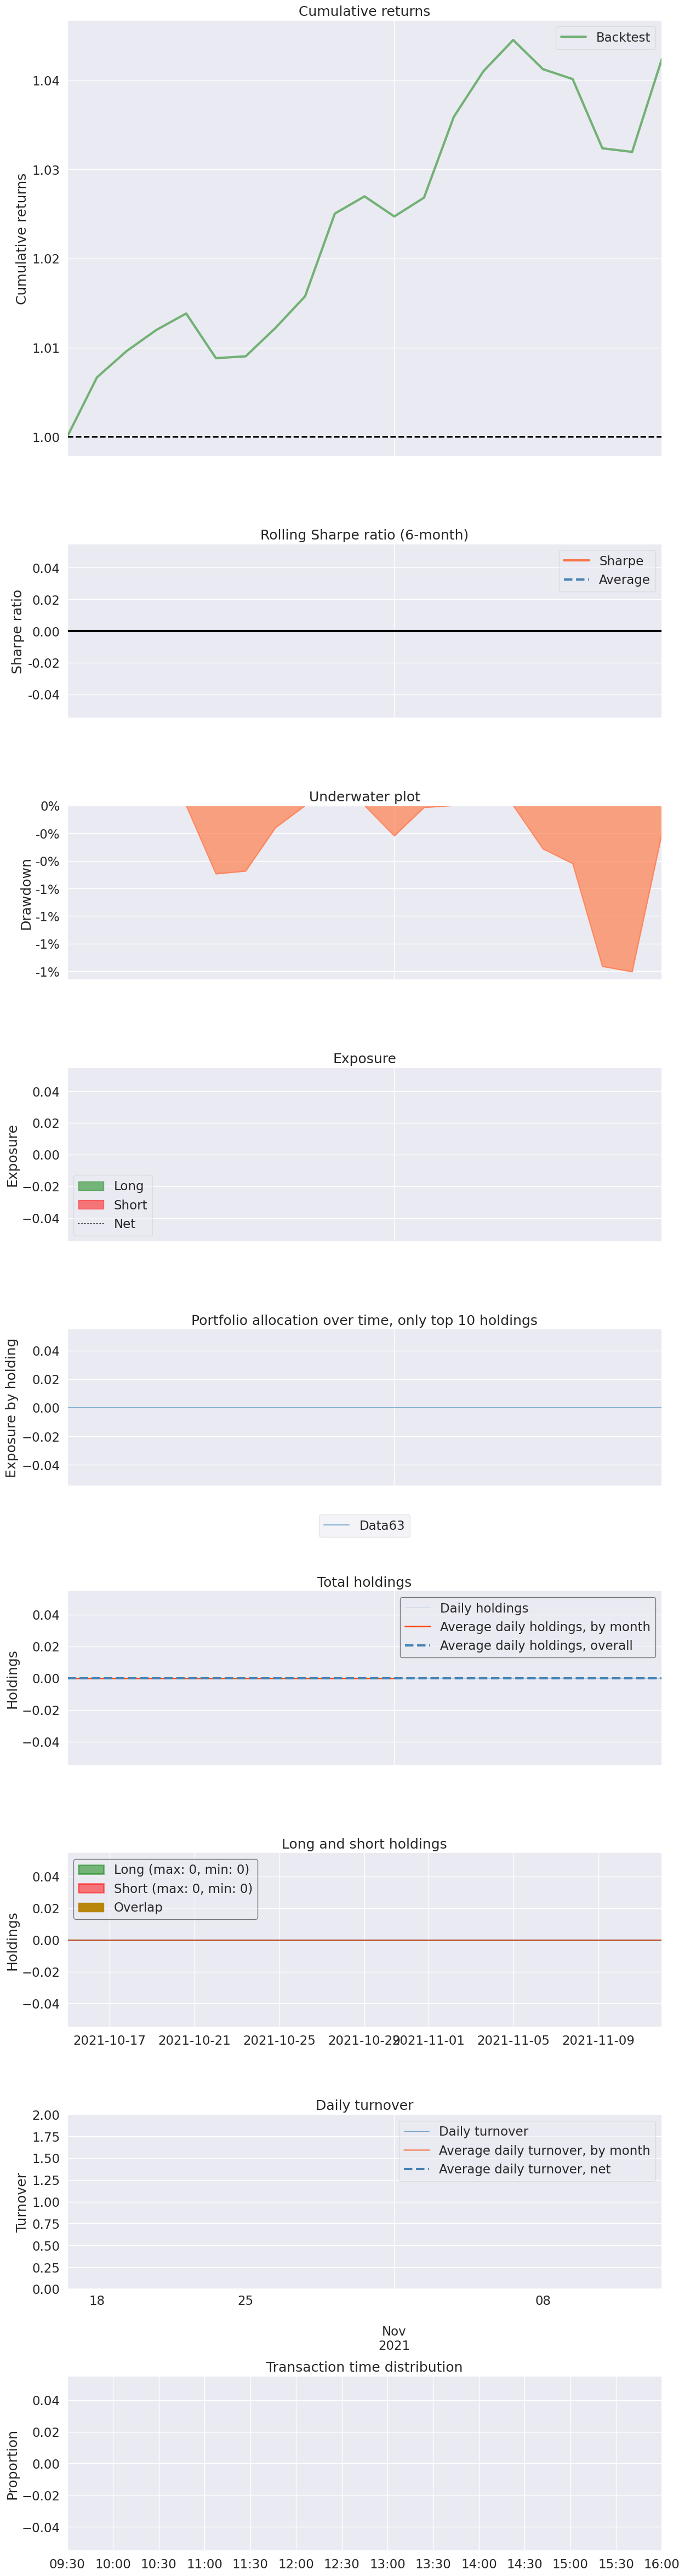

In [161]:
# Running the Random Forest 30 day predictions with COVID and Financial data
financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
features = financial_features + covid_features
metrics, trained_model, test_data_set = run_random_forest(features, 30, 50, 9, 8)  
print(metrics)

# Predicting companies
specific_date = pd.Timestamp('2021-10-15')
predicted_companies = rank_predicted_companies(trained_model, test_data_set, features, specific_date)

# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'

# Selecting top 20 companies based on probability
top_companies = predicted_companies

# Map company names to tickers
selected_tickers = [name_to_ticker[company[0]] for company in top_companies]

print("Selected tickers:", selected_tickers)

weights = optimize_portfolio_prior(selected_tickers, market_caps, 10)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


# Random Forest Positive Return Probabilities Stock Selection One Month Backtest (Can be run with usable_data.csv)

OrderedDict([('PM', 0.03515), ('BAC', 0.00386), ('GOOG', 0.33171), ('ACN', 0.03419), ('COST', 0.07786), ('KO', 0.08009), ('MSFT', 0.35514), ('HPQ', 0.00434), ('NTDOY', 0.02799), ('LRLCF', 0.04966)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 108057.00028364944,
 'sharpe_ratio': None,
 'max_drawdown': 1.3637935846847031,
 'cumulative_returns': 0.08057000283649463}

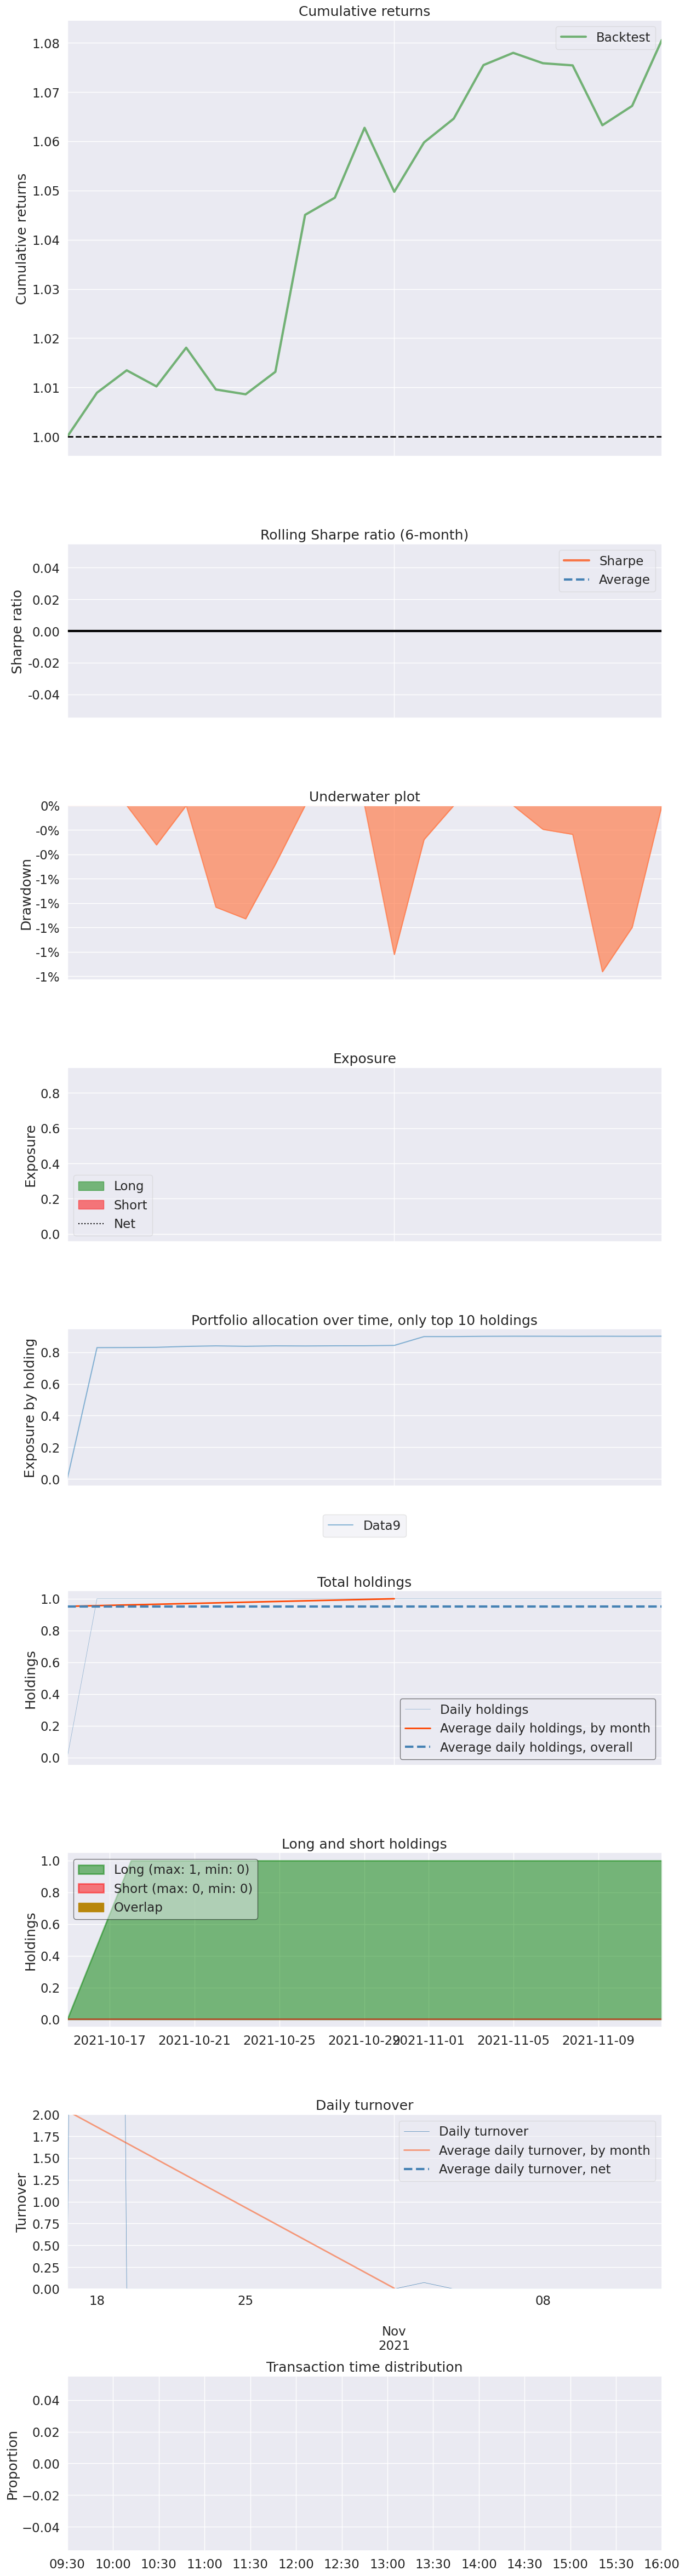

In [155]:
# Running the Random Forest
financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
features = financial_features + covid_features
metrics, trained_model, test_data_set = run_random_forest(features, 30, 50, 9, 8)  

# Predicting companies
specific_date = pd.Timestamp('2021-10-15')
predictions = rank_predicted_companies(trained_model, test_data_set, features, specific_date)

top_10_companies = predicted_companies[:10]

# Map company names to tickers
selected_tickers = [name_to_ticker[company[0]] for company in top_10_companies]

# 2. Portfolio Optimization
weights = optimize_portfolio_prior(selected_tickers, market_caps, 10)
print(weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)



In [66]:
import unittest
from unittest.mock import patch, MagicMock

In [107]:
class RFRegressionTests(unittest.TestCase):

    def setUp(self):
        self.financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

        self.covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
        self.features = self.financial_features + self.covid_features
        self.metrics, self.trained_model, self.test_data_set = run_random_forest(features, 30, 50, 9, 8) 
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.selected_tickers = ['PM', 'BAC', 'GOOG', 'ACN', 'COST', 'KO', 'MSFT', 'HPQ', 'NTDOY', 'LRLCF']

    def test_sentiment_ranking(self):
        
        """
        Test to verify the top ranked companies based on sentiments from the Random Forest model.
        The test checks if at least 60% of the expected companies are within the model's top rankings.
        """
        
        expected_ranked_companies = ['PM', 'BAC', 'GOOG', 'ACN',
                                     'COST', 'KO', 'MSFT', 'HPQ', 'NTDOY', 'LRLCF']  
        specific_date = pd.Timestamp('2021-10-15')
        predictions = rank_predicted_companies(self.trained_model, self.test_data_set, self.features, specific_date)
        top_10_companies = predicted_companies[:10]

        # Map company names to tickers
        selected_tickers = [name_to_ticker[company[0]] for company in top_10_companies]

        common_elements = len(set(selected_tickers) & set(expected_ranked_companies))
    
        threshold = 0.6 * len(expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        
        """
        Test to verify the weights allocated to each company after portfolio optimisation.
        The test checks if the derived weights are close to the expected weights (within a 10% tolerance).
        """
        
        expected_weights = {
            'PM': 0.03515, 'BAC': 0.00386, 'GOOG': 0.33171, 'ACN': 0.03419, 
            'COST': 0.07786, 'KO': 0.08009, 'MSFT': 0.35514, 'HPQ': 0.00434, 
            'NTDOY': 0.02799, 'LRLCF': 0.04966
        }
        weights = optimize_portfolio_prior(self.selected_tickers, market_caps, self.top_n)
        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        
        """
        Test to verify the performance metrics (maximum drawdown and cumulative returns) from the backtest.
        The test checks if the derived metrics are close to the expected values (within a set tolerance).
        """
        
        expected_max_drawdown = 1.3637935846847031
        expected_returns = 0.08057000283649463

        results = run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest, False)
        
        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.25)
        self.assertAlmostEqual(results['cumulative_returns'], expected_returns, delta=0.04)
        
suite1 = unittest.TestLoader().loadTestsFromTestCase(RFRegressionTests)

all_tests = unittest.TestSuite([suite1])   

runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)

test_backtest_results (__main__.RFRegressionTests)
Test to verify the performance metrics (maximum drawdown and cumulative returns) from the backtest. ... ok
test_portfolio_optimization (__main__.RFRegressionTests)
Test to verify the weights allocated to each company after portfolio optimisation. ... ok
test_sentiment_ranking (__main__.RFRegressionTests)
Test to verify the top ranked companies based on sentiments from the Random Forest model. ... ok

----------------------------------------------------------------------
Ran 3 tests in 9.040s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## COVID Sentiment Factor Model Stock Selection Backtest (Can be run with usable_data.csv)

OrderedDict([('HPQ', 0.00585), ('BAC', 0.0), ('F', 0.0194), ('HYMTF', 0.01476), ('CS.PA', 0.05011), ('JPM', 0.13753), ('GOOG', 0.49982), ('V', 0.13054), ('COST', 0.11407), ('ADDYY', 0.0279)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 104567.45908654024,
 'sharpe_ratio': None,
 'max_drawdown': 1.523851336655606,
 'cumulative_returns': 0.045674590865402376}

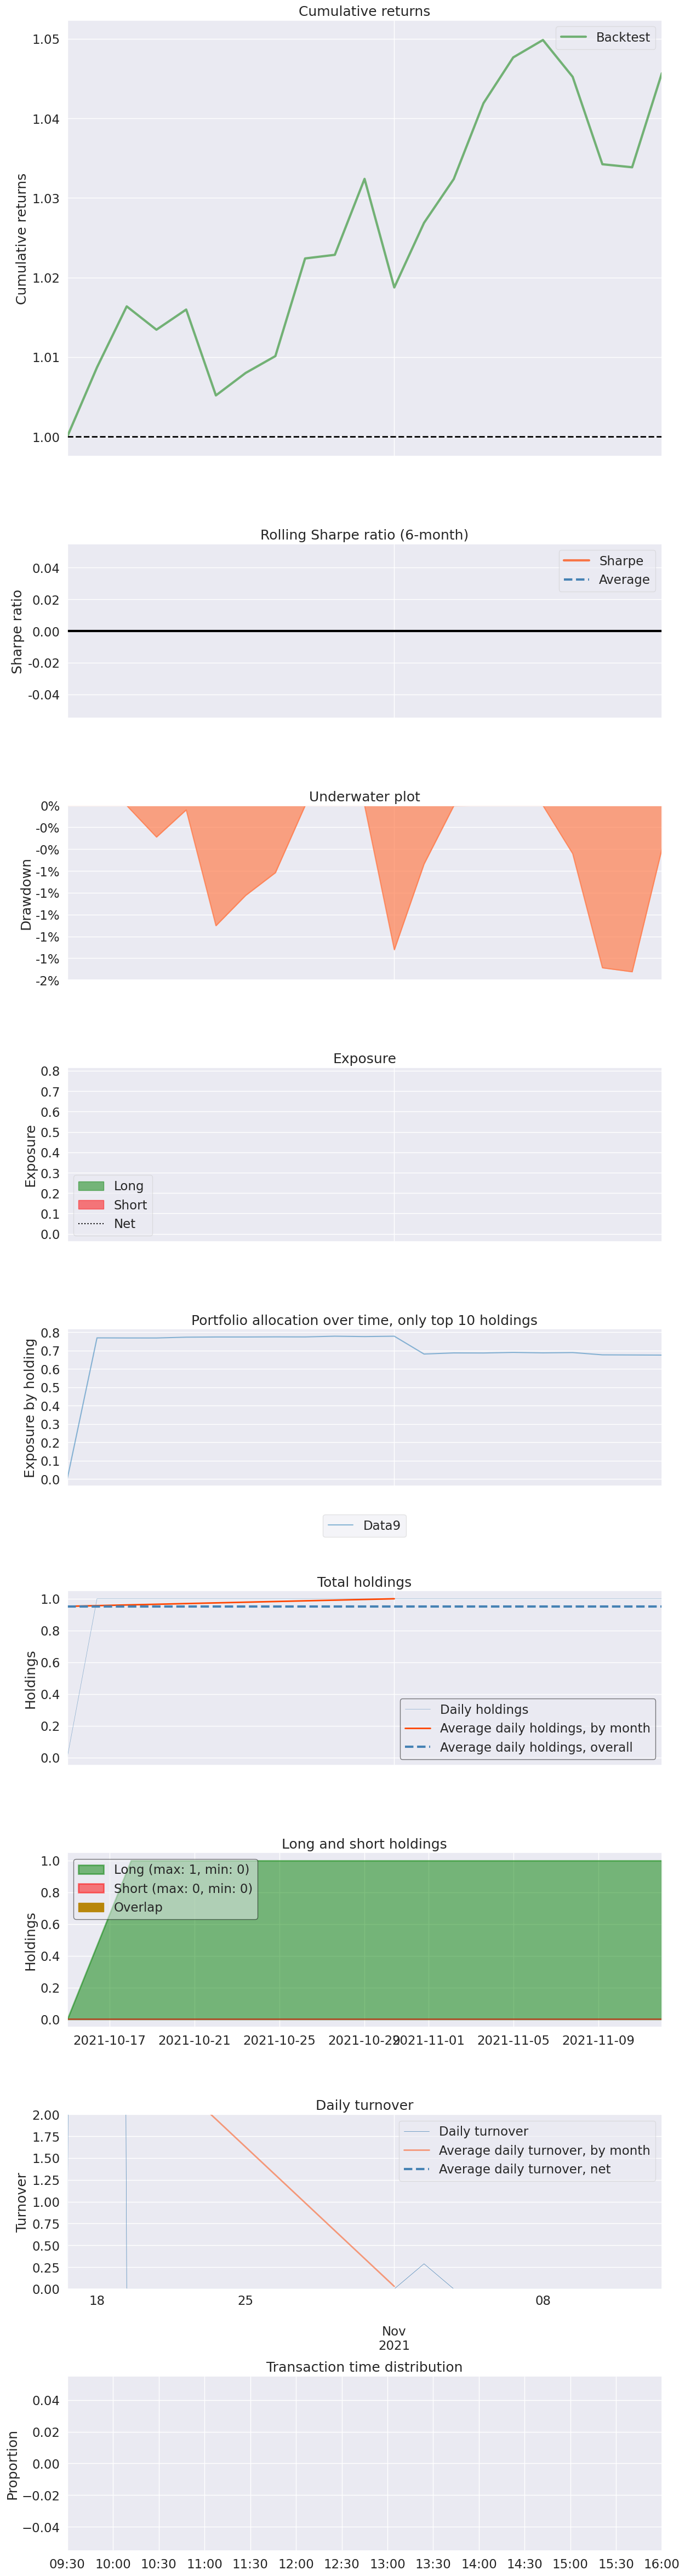

In [156]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, "COVID_sentiment", end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]

weights = optimize_portfolio_prior(selected_tickers, market_caps, top_n)
print(weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


In [110]:
class COVIDRegressionTests(unittest.TestCase):
    def setUp(self):
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.selected_tickers = {'HPQ': 0.15668423096365808, 'BAC': 0.09815280839911021, 
                                 'F': 0.04091703165836277, 'HYMTF': 0.035412753466896846,
                                 'CS.PA': 0.03196070388381978, 'JPM': 0.027071263475308728, 
                                 'GOOG': 0.025999335672527477, 'V': 0.022158536947177218, 'COST': 0.01706768694698748, 'ADDYY': 0.011089382630976637}

    def test_sentiment_ranking(self):
        expected_ranked_companies = ['HPQ', 'BAC', 'F', 'HYMTF',
                                     'CS.PA', 'JPM', 'GOOG', 'V', 'COST', 'ADDYY']  
        ranked_companies = rank_companies_by_sentiment(self.data, "COVID_sentiment", self.end_date, self.top_n)
        ranked_companies = [ticker for ticker in ranked_companies.keys()]
        self.selected_tickers = ranked_companies
        common_elements = len(set(ranked_companies) & set(expected_ranked_companies))
    
        threshold = 0.6 * len(expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        expected_weights = {
            'HPQ': 0.00585, 'BAC': 0.0, 'F': 0.0194, 'HYMTF': 0.01476, 'CS.PA': 0.05011, 
            'JPM': 0.13753, 'GOOG': 0.49982, 'V': 0.13054, 'COST': 0.11407, 'ADDYY': 0.0279
        }
        weights = optimize_portfolio_prior(self.selected_tickers, market_caps, self.top_n)
        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        expected_max_drawdown = 1.5238
        expected_returns = 0.045674

        results = run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest, False)
        
        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.25)
        self.assertAlmostEqual(results['cumulative_returns'], expected_returns, delta=0.04)
        
suite1 = unittest.TestLoader().loadTestsFromTestCase(COVIDRegressionTests)
all_tests = unittest.TestSuite([suite1])   
runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)

test_backtest_results (__main__.COVIDRegressionTests) ... ok
test_portfolio_optimization (__main__.COVIDRegressionTests) ... ok
test_sentiment_ranking (__main__.COVIDRegressionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 4.691s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## ESG Sentiment Factor Model Stock Selection Backtest

{'RMS.PA': 0.059278397090590004, 'KO': 0.058072980017620346, 'KER.PA': 0.03290776023294445, 'F': 0.020148142827464622, 'ACN': 0.018569750565821476, 'GM': 0.018368449107128176, 'PYPL': 0.00843220425437382, 'HD': 0.005042427929758869, 'CVS': 0.004452384583114297, 'BNC.L': 0.003520376382902658}
Selected tickers: ['RMS.PA', 'KO', 'KER.PA', 'F', 'ACN', 'GM', 'PYPL', 'HD', 'CVS', 'BNC.L']
Black-Litterman Weights with Views: OrderedDict([('RMS.PA', 0.13998), ('KO', 0.16978), ('KER.PA', 0.0359), ('F', 0.0334), ('ACN', 0.10978), ('GM', 0.03724), ('PYPL', 0.1636), ('HD', 0.19502), ('CVS', 0.07469), ('BNC.L', 0.04062)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 102930.29309179497,
 'sharpe_ratio': None,
 'max_drawdown': 2.267054255686671,
 'cumulative_returns': 0.02930293091795022}

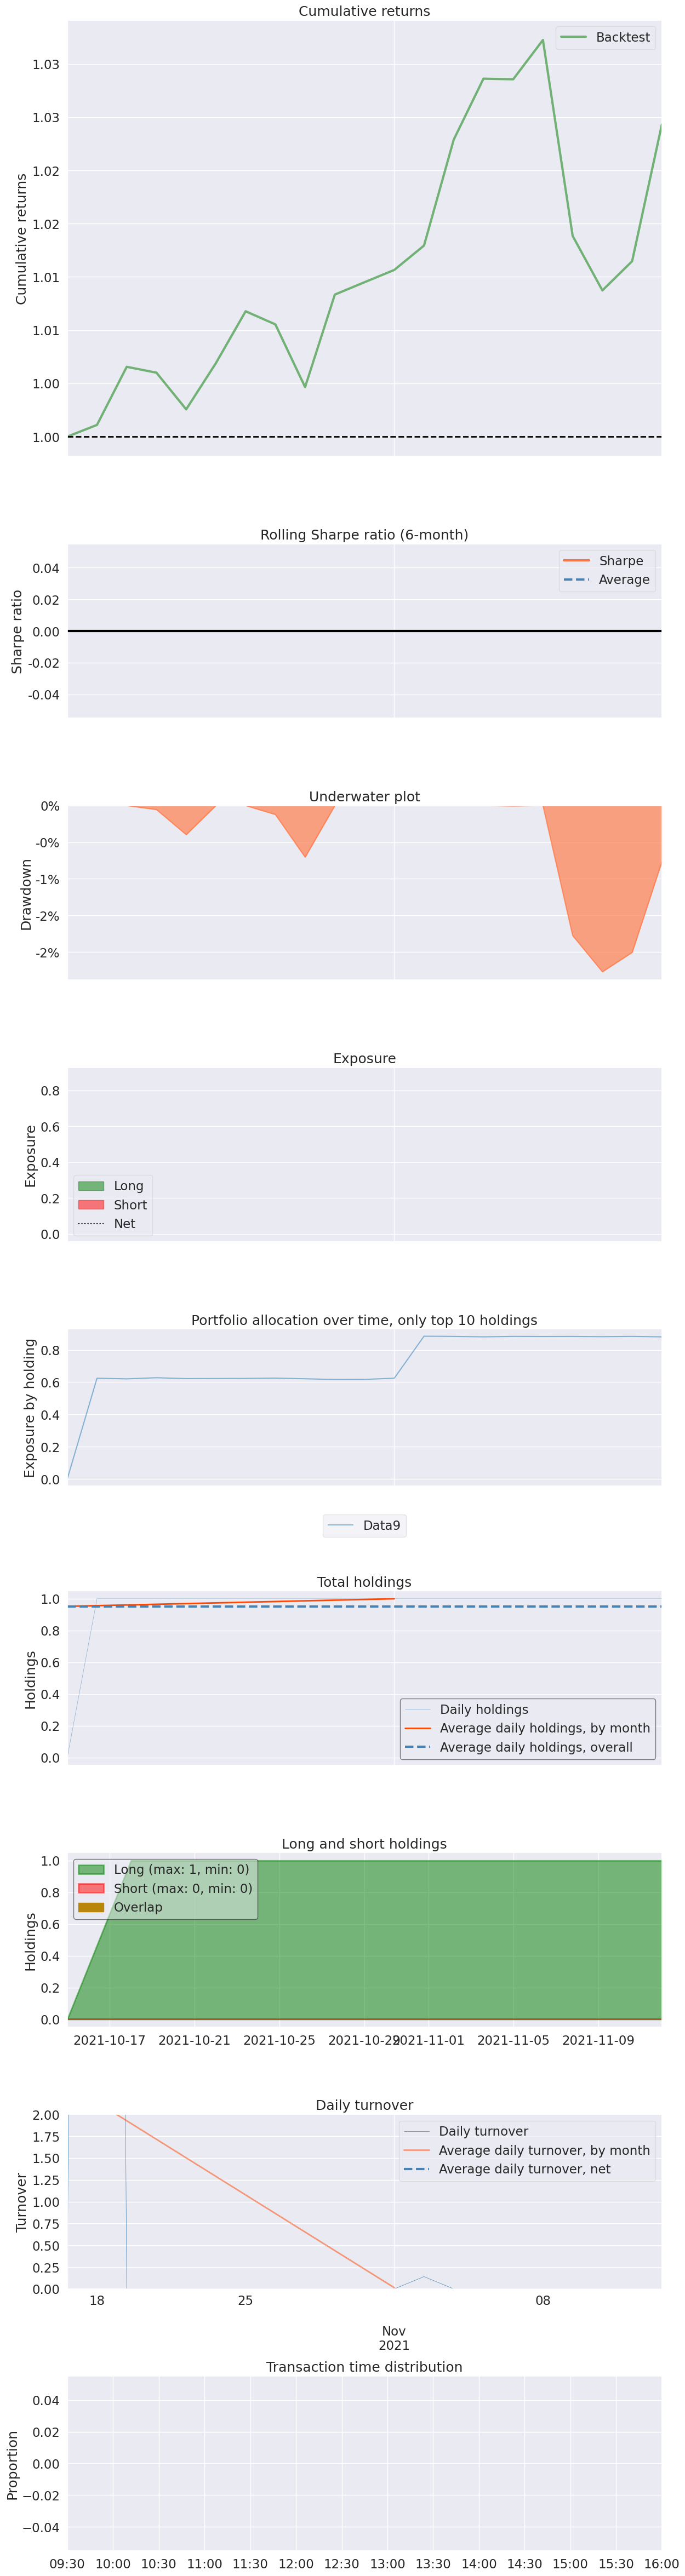

In [162]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'ESG News Sentiment ES Positive', end_date, top_n)
print(ranked_companies)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio_prior(selected_tickers, market_caps, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


In [77]:
class ESGRegressionTests(unittest.TestCase):
    def setUp(self):
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.expected_ranked_companies = ['RMS.PA', 'KO', 'KER.PA', 'F', 'ACN', 'GM', 'PYPL', 'HD', 'CVS', 'BNC.L']

    def test_sentiment_ranking(self):
        
        ranked_companies = rank_companies_by_sentiment(self.data, "ESG News Sentiment ES Positive", self.end_date, self.top_n)
        ranked_companies = [ticker for ticker in ranked_companies.keys()]

        common_elements = len(set(ranked_companies) & set(self.expected_ranked_companies))

        threshold = 0.6 * len(self.expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        expected_weights = {
            'RMS.PA': 0.13997, 'KO': 0.16978, 'KER.PA': 0.0359, 'F': 0.0334, 'ACN': 0.10978, 
            'GM': 0.03724, 'PYPL': 0.1636, 'HD': 0.19502, 'CVS': 0.07469, 'BNC.L': 0.04062
        }
        selected_tickers = self.expected_ranked_companies
        weights = optimize_portfolio_prior(selected_tickers, market_caps, self.top_n)
        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        expected_max_drawdown = 2.267054255686671
        expected_returns = 0.02930293091795022
        
        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)

        results = run_backtest(self.expected_ranked_companies, weights, start_date_backtest, end_date_backtest, False)

        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.25)
        self.assertAlmostEqual(results['cumulative_returns'], expected_returns, delta=0.04)

suite1 = unittest.TestLoader().loadTestsFromTestCase(ESGRegressionTests)
all_tests = unittest.TestSuite([suite1])   
runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_backtest_results (__main__.ESGRegressionTests) ... ok
test_portfolio_optimization (__main__.ESGRegressionTests) ... ok
test_sentiment_ranking (__main__.ESGRegressionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 7.050s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## News Sentiment Factor Model Stock Selection Backtest

Selected tickers: ['HPQ', 'SAP', 'SBUX', 'NFLX', 'COST', 'DIS', 'AXP', 'BNC.L', 'HYMTF', 'ADDYY']
Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.01924), ('SAP', 0.10543), ('SBUX', 0.09219), ('NFLX', 0.17603), ('COST', 0.18051), ('DIS', 0.21209), ('AXP', 0.07311), ('BNC.L', 0.05562), ('HYMTF', 0.03311), ('ADDYY', 0.05268)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 102594.08758445739,
 'sharpe_ratio': None,
 'max_drawdown': 2.2853753149331477,
 'cumulative_returns': 0.02594087584457383}

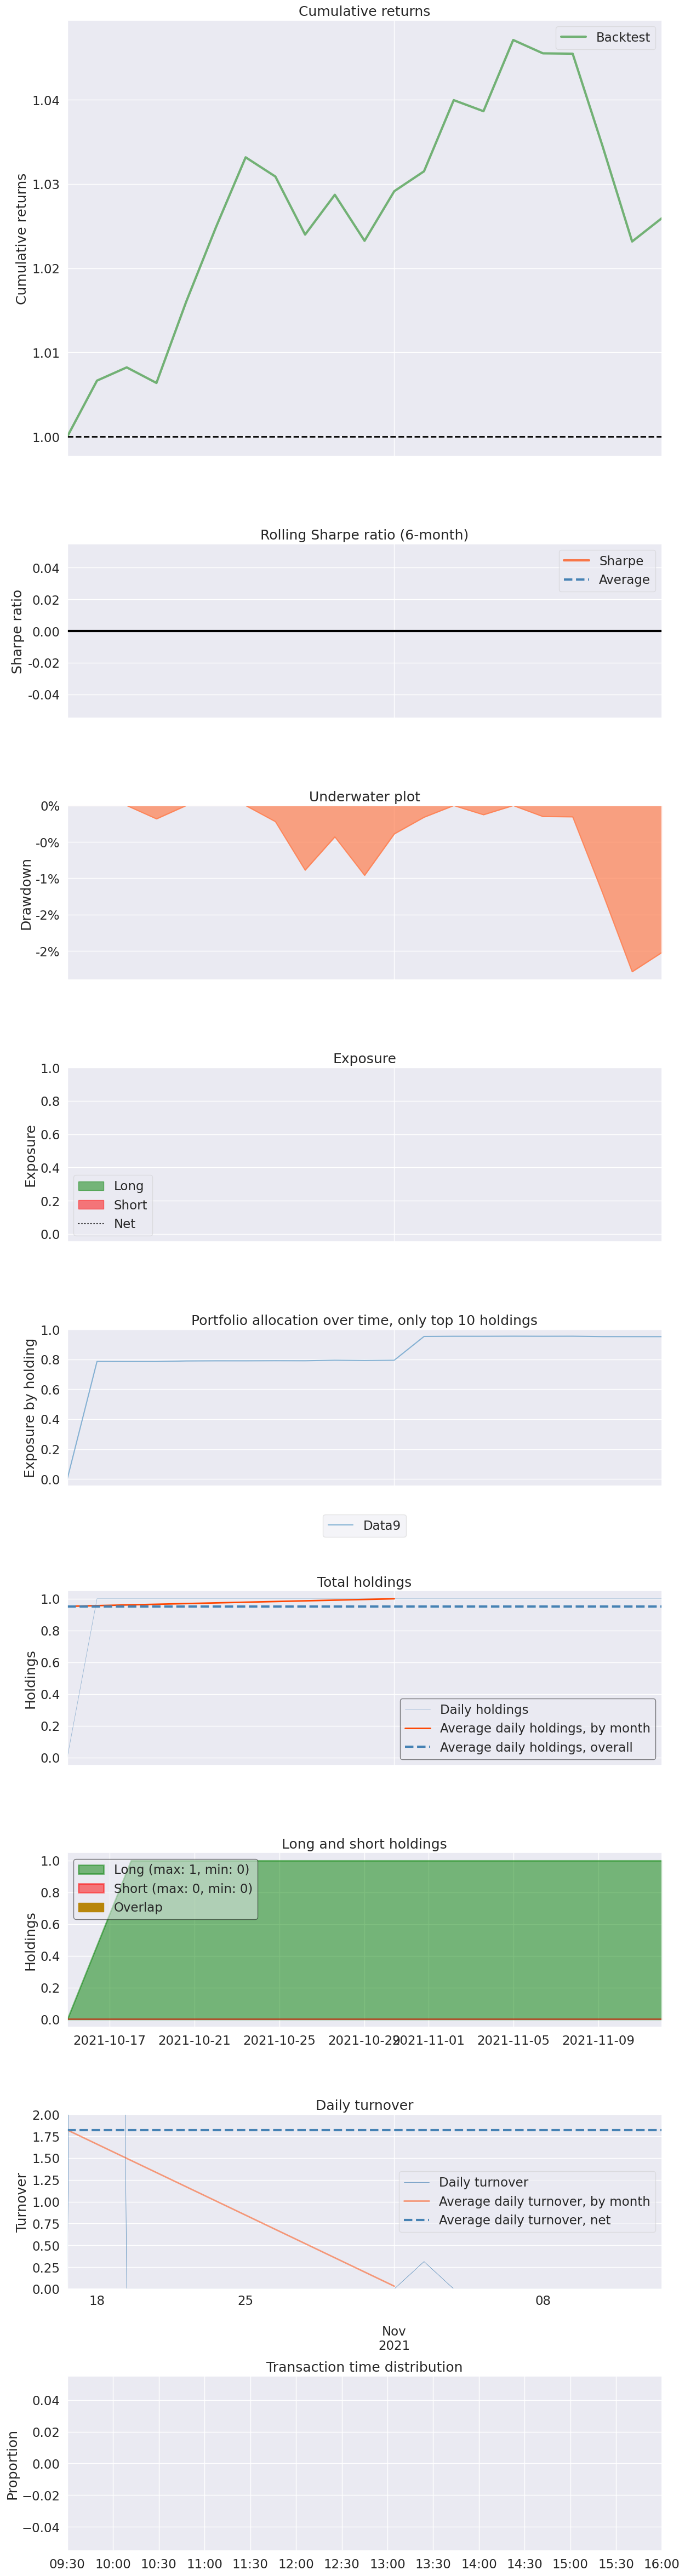

In [185]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'News Sentiment - Daily Average', end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio_prior(selected_tickers, market_caps, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


In [83]:
import unittest

class NewsRegressionTests(unittest.TestCase):
    def setUp(self):
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.expected_ranked_companies = ['HPQ', 'SAP', 'SBUX', 'NFLX', 'COST', 'DIS', 'AXP', 'BNC.L', 'HYMTF', 'ADDYY']

    def test_sentiment_ranking(self):
        ranked_companies = rank_companies_by_sentiment(self.data, "News Sentiment - Daily Average", self.end_date, self.top_n)
        ranked_companies = [ticker for ticker in ranked_companies.keys()]

        common_elements = len(set(ranked_companies) & set(self.expected_ranked_companies))
        threshold = 0.6 * len(self.expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        expected_weights = {
            'HPQ': 0.01924, 'SAP': 0.10543, 'SBUX': 0.09219, 'NFLX': 0.17603, 'COST': 0.18051,
            'DIS': 0.21209, 'AXP': 0.07311, 'BNC.L': 0.05562, 'HYMTF': 0.03311, 'ADDYY': 0.05268
        }

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)

        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        expected_max_drawdown = 2.2853753149331477
        expected_cumulative_returns = 0.02594087584457383

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)
        results = run_backtest(self.expected_ranked_companies, weights, start_date_backtest, end_date_backtest, False)

        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.01)
        self.assertAlmostEqual(results['cumulative_returns'], expected_cumulative_returns, delta=0.001)

suite1 = unittest.TestLoader().loadTestsFromTestCase(NewsRegressionTests)
all_tests = unittest.TestSuite([suite1])   
runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_backtest_results (__main__.NewsRegressionTests) ... ok
test_portfolio_optimization (__main__.NewsRegressionTests) ... ok
test_sentiment_ranking (__main__.NewsRegressionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 6.824s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Twitter Sentiment Factor Model Stock Selection Backtest

Selected tickers: ['CS.PA', 'QSR', 'IDEXF', 'HYMTF', 'DIS', 'EBAY', 'SAP', 'TMUS', 'ADBE', 'AMZN']
Black-Litterman Weights with Views: OrderedDict([('CS.PA', 0.04706), ('QSR', 0.01169), ('IDEXF', 0.0378), ('HYMTF', 0.01681), ('DIS', 0.10817), ('EBAY', 0.03329), ('SAP', 0.05629), ('TMUS', 0.06562), ('ADBE', 0.07973), ('AMZN', 0.54355)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 102073.78479579925,
 'sharpe_ratio': None,
 'max_drawdown': 2.900485667073985,
 'cumulative_returns': 0.02073784795799205}

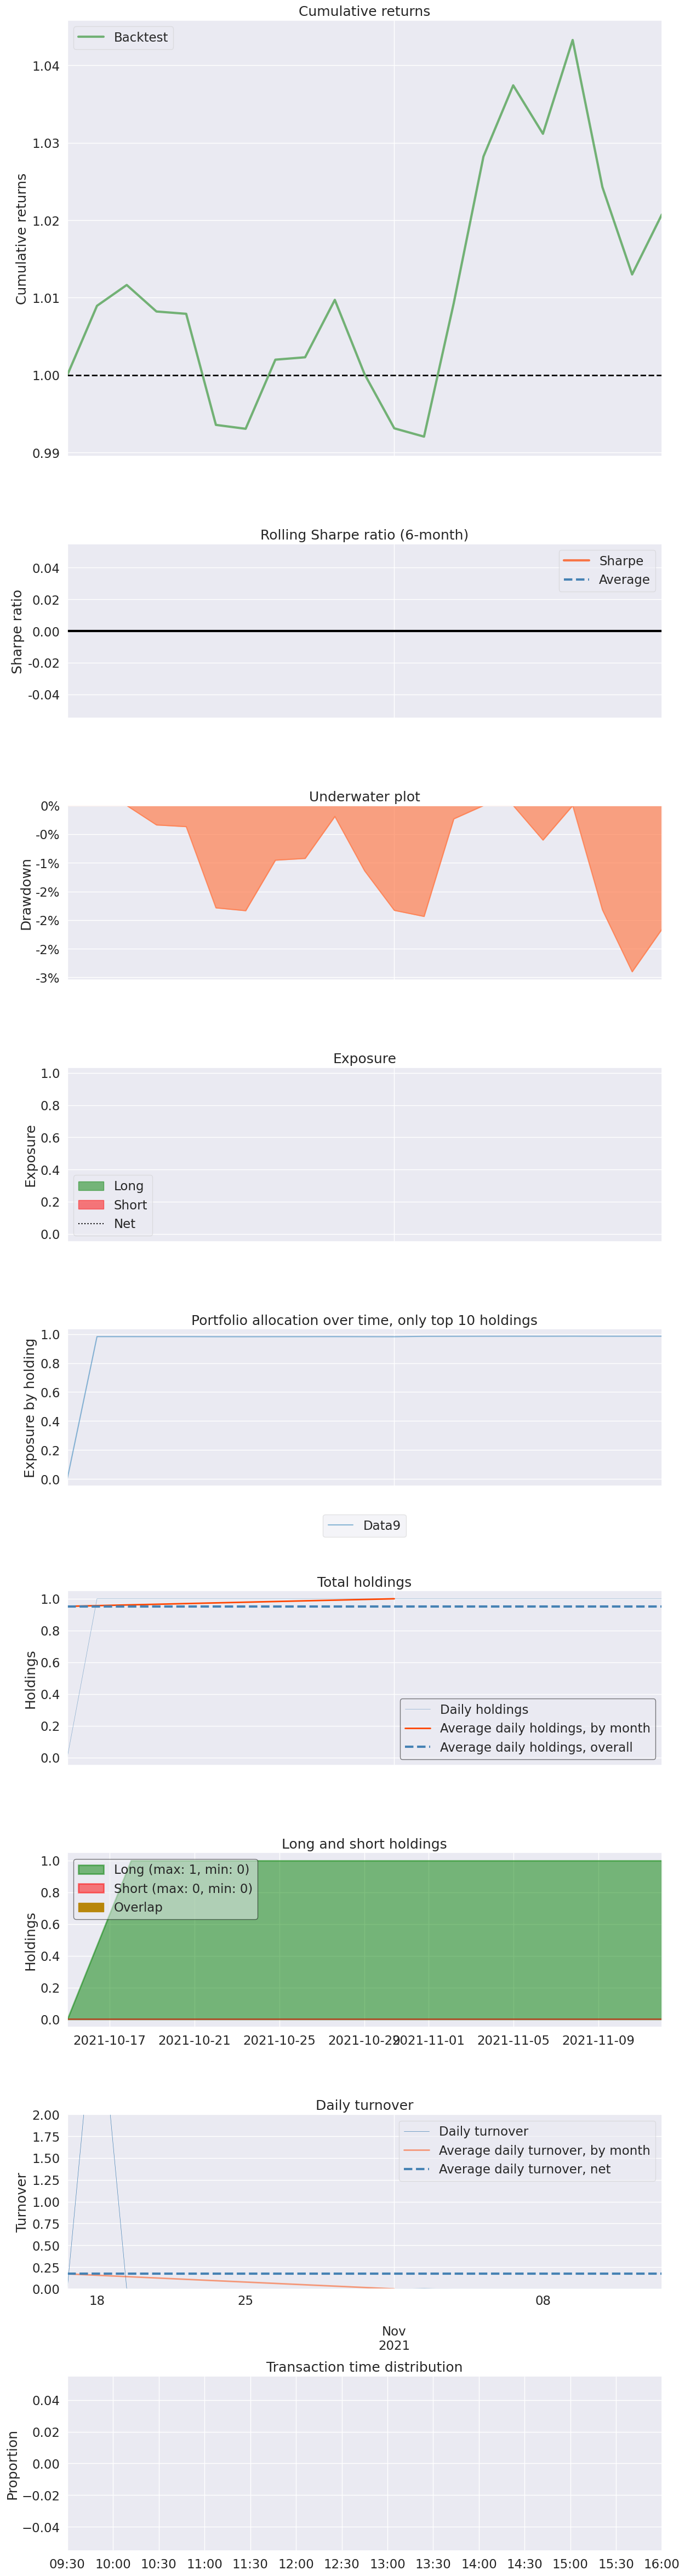

In [184]:
# Assuming the required imports have already been made...

# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'Twitter Sentiment Daily Average', end_date, top_n)
#print(ranked_companies.index.tolist())

# 2. Portfolio Optimization
#selected_tickers = [name_to_ticker[company] for company in ranked_companies.index.tolist()]
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio_prior(selected_tickers, market_caps, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


In [85]:
import unittest

class TwitterRegressionTests(unittest.TestCase):
    def setUp(self):
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.expected_ranked_companies = ['CS.PA', 'QSR', 'IDEXF', 'HYMTF', 'DIS', 'EBAY', 'SAP', 'TMUS', 'ADBE', 'AMZN']

    def test_sentiment_ranking(self):
        ranked_companies = rank_companies_by_sentiment(self.data, "Twitter Sentiment Daily Average", self.end_date, self.top_n)
        ranked_companies = [ticker for ticker in ranked_companies.keys()]

        common_elements = len(set(ranked_companies) & set(self.expected_ranked_companies))
        threshold = 0.6 * len(self.expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        expected_weights = {
            'CS.PA': 0.04706, 'QSR': 0.01169, 'IDEXF': 0.0378, 'HYMTF': 0.01681, 'DIS': 0.10817,
            'EBAY': 0.03329, 'SAP': 0.05629, 'TMUS': 0.06562, 'ADBE': 0.07973, 'AMZN': 0.54355
        }

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)

        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        expected_max_drawdown = 2.900485667073985
        expected_cumulative_returns = 0.02073784795799205

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)
        results = run_backtest(self.expected_ranked_companies, weights, start_date_backtest, end_date_backtest, False)

        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.01)
        self.assertAlmostEqual(results['cumulative_returns'], expected_cumulative_returns, delta=0.001)

suite1 = unittest.TestLoader().loadTestsFromTestCase(TwitterRegressionTests)
all_tests = unittest.TestSuite([suite1])   
runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_backtest_results (__main__.TwitterRegressionTests) ... ok
test_portfolio_optimization (__main__.TwitterRegressionTests) ... ok
test_sentiment_ranking (__main__.TwitterRegressionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 6.295s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Multi-Factor Model Stock Selection Backtest

Selected tickers: ['HPQ', 'BAC', 'CS.PA', 'KO', 'F', 'RMS.PA', 'HYMTF', 'JPM', 'COST', 'SBUX']
Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.01391), ('BAC', 0.01563), ('CS.PA', 0.06049), ('KO', 0.1789), ('F', 0.03598), ('RMS.PA', 0.13016), ('HYMTF', 0.03061), ('JPM', 0.29417), ('COST', 0.16658), ('SBUX', 0.07357)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 106691.54342730141,
 'sharpe_ratio': None,
 'max_drawdown': 0.8112676228903231,
 'cumulative_returns': 0.06691543427301472}

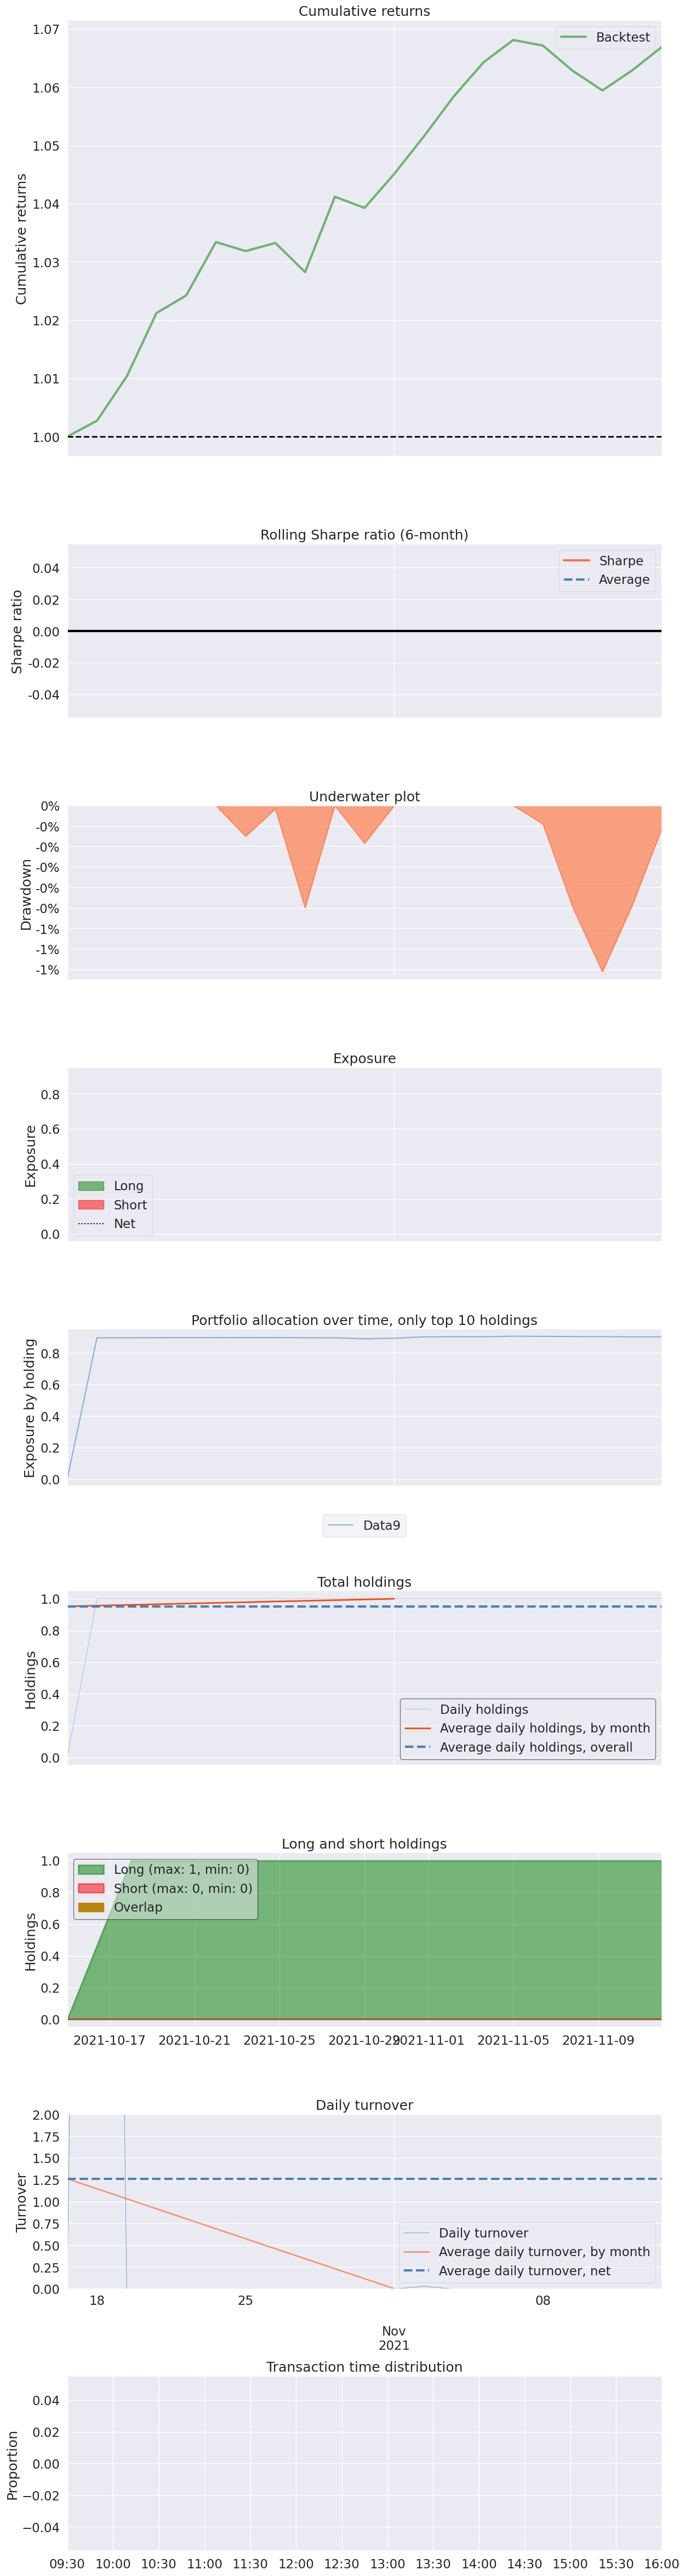

In [103]:
sentiment_factors = ['COVID_sentiment', 'News Sentiment - Daily Average', 'ESG News Sentiment ES Positive', 'Twitter Sentiment Daily Average']
ranked_companies = rank_companies_by_sentiments(df, sentiment_factors, '2021-10-15')

# 2. Portfolio Optimization
selected_tickers = [name_to_ticker[company] for company in ranked_companies.index.tolist()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio_prior(selected_tickers, market_caps, 10)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


In [93]:
import unittest

class MultiFactorRegressionTests(unittest.TestCase):
    def setUp(self):
        self.data = df
        self.end_date = '2021-10-15'
        self.top_n = 10
        self.sentiment_factors = ['COVID_sentiment', 'News Sentiment - Daily Average', 'ESG News Sentiment ES Positive', 'Twitter Sentiment Daily Average']
        self.expected_ranked_companies = ['HPQ', 'BAC', 'CS.PA', 'KO', 'F', 'RMS.PA', 'HYMTF', 'JPM', 'COST', 'SBUX']

    def test_sentiment_ranking(self):
        ranked_companies_df = rank_companies_by_sentiments(self.data, self.sentiment_factors, self.end_date)
        ranked_companies = ranked_companies_df


        common_elements = len(set(ranked_companies) & set(self.expected_ranked_companies))
        threshold = 0.6 * len(self.expected_ranked_companies)

        self.assertGreaterEqual(common_elements, threshold)

    def test_portfolio_optimization(self):
        expected_weights = {
            'HPQ': 0.01391, 'BAC': 0.01563, 'CS.PA': 0.06049, 'KO': 0.1789, 'F': 0.03598,
            'RMS.PA': 0.13016, 'HYMTF': 0.03061, 'JPM': 0.29417, 'COST': 0.16658, 'SBUX': 0.07357
        }

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)

        for ticker, weight in weights.items():
            self.assertAlmostEqual(weight, expected_weights[ticker], delta=0.1)  # Tolerance of 10%

    def test_backtest_results(self):
        expected_max_drawdown = 0.8112676228903231
        expected_cumulative_returns = 0.06691543427301472

        weights = optimize_portfolio_prior(self.expected_ranked_companies, market_caps, self.top_n)
        results = run_backtest(self.expected_ranked_companies, weights, start_date_backtest, end_date_backtest, False)

        self.assertAlmostEqual(results['max_drawdown'], expected_max_drawdown, delta=0.01)
        self.assertAlmostEqual(results['cumulative_returns'], expected_cumulative_returns, delta=0.001)

suite1 = unittest.TestLoader().loadTestsFromTestCase(MultiFactorRegressionTests)
all_tests = unittest.TestSuite([suite1])   
runner = unittest.TextTestRunner(verbosity=2)
runner.run(all_tests)


test_backtest_results (__main__.MultiFactorRegressionTests) ... ok
test_portfolio_optimization (__main__.MultiFactorRegressionTests) ... ok
test_sentiment_ranking (__main__.MultiFactorRegressionTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 7.146s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

# RF Views One Month Backtest (Can be run with usable_data.csv)

{'V': 0.020872179054359733, 'GOOG': 0.06568694813680973, 'BAC': 0.07061179353041096, 'UBS': 0.05047124904095375, 'AMZN': 0.021590092021387907, 'WFC': 0.03151439481856959, 'HPQ': 0.0648335601391491, 'HMC': -0.04119021474417577, 'DANOY': 0.0062507616183241, 'DIS': 0.015619735764879397, 'WMT': 0.013060729586353254, 'UPS': 0.09091764100112894, 'SAP': 0.018253290278952707, 'AAPL': -0.025184389105173847, 'GM': 0.0006099489464964431, 'T': -0.01939831156992694, 'F': -0.009725992587494015, 'C': -0.22573597480856125, 'KO': 0.08785803071243654, 'SIE.DE': 0.020931290910350238, 'META': 0.02312040707387611, 'CS.PA': 0.009147835588632483, 'INTC': 0.016540583477126974, 'VOW.DE': -0.06926701100022234, 'NTDOY': 0.03328187939767509, 'FDX': 0.022454137143857758, 'CSCO': 0.020738071034103855, 'FOX': -0.05587700554226415, 'COST': 0.027824263801182757, 'CVS': -0.007435363701011923, 'NFLX': 0.020684920844262673, 'MSFT': 0.022584837800871012, 'HD': 0.018111386426131793, 'MCD': 0.017544624701239568, 'TMUS': 0.0

/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


OrderedDict([('PM', 0.0), ('BAC', 0.0), ('GOOG', 0.49115), ('ACN', 0.0), ('COST', 0.0), ('KO', 0.3309), ('MSFT', 0.1741), ('HPQ', 0.0), ('NTDOY', 0.0), ('LRLCF', 0.00385)])
['PM', 'BAC', 'GOOG', 'ACN', 'COST', 'KO', 'MSFT', 'HPQ', 'NTDOY', 'LRLCF']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 106066.20559633637,
 'sharpe_ratio': None,
 'max_drawdown': 1.7167235380976955,
 'cumulative_returns': 0.06066205596336349}

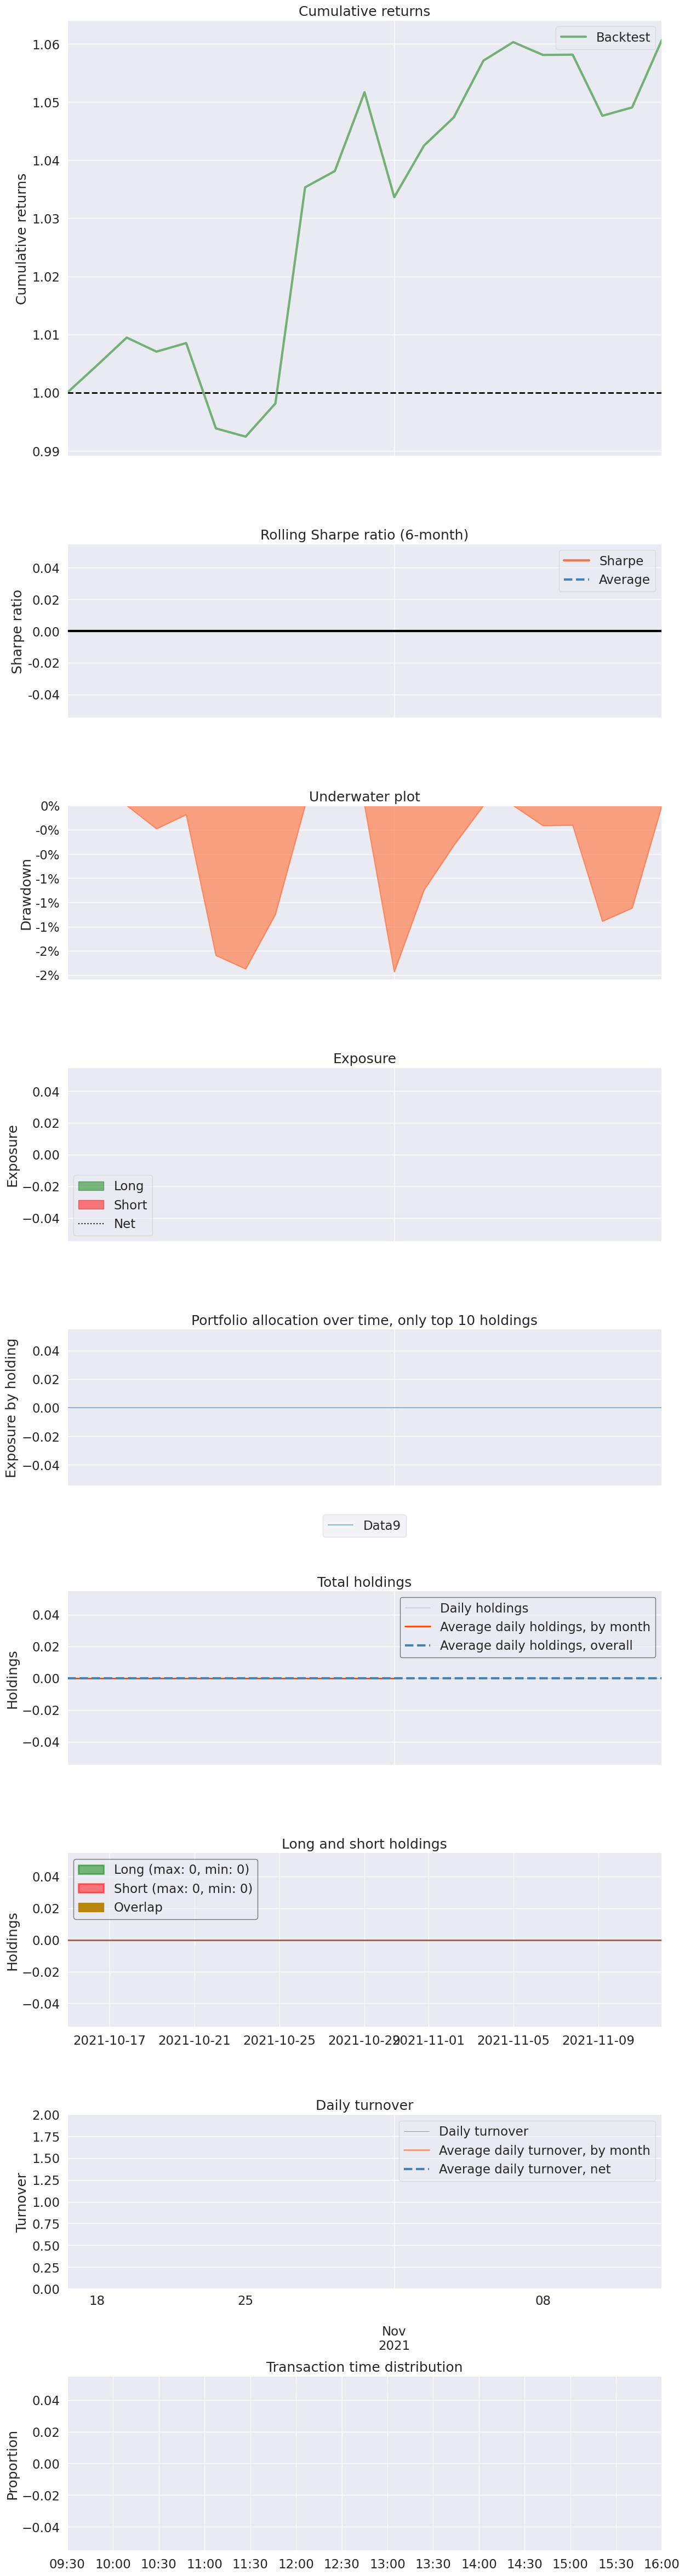

In [113]:
# Running the Random Forest to obtain view predictions
financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
features = financial_features + covid_features
results, model, test_data = run_random_forest_regressor(features, df)
target_date = datetime(2021, 10, 15)

# obtaining most recent dated prediction for each company
views = get_view_on_date(test_data, target_date)
print(views)

metrics, trained_model, test_data_set = run_random_forest(features, 30, 50, 9, 8) 

# Predicting companies
specific_date = pd.Timestamp('2021-10-15')
predicted_companies = rank_predicted_companies(trained_model, test_data_set, features, specific_date)

# Selecting top 20 companies based on probability
top_10_companies = predicted_companies[:10]

# Map company names to tickers
selected_tickers = [name_to_ticker[company[0]] for company in top_10_companies]

#views = {ticker: views[ticker] for ticker in selected_tickers if ticker in views}
views = {ticker: views[ticker] if ticker in views else 0 for ticker in selected_tickers}

weights = optimize_portfolio(selected_tickers, market_caps, views, top_n=10)
print(weights)
print(selected_tickers)

start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)

## COVID Sentiment Single Factor View One Month Backtest (Can be run with usable_data.csv)

Selected tickers: ['HPQ', 'BAC', 'F', 'HYMTF', 'CS.PA', 'JPM', 'GOOG', 'V', 'COST', 'ADDYY']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.25791), ('BAC', 0.0248), ('F', 0.0), ('HYMTF', 0.01571), ('CS.PA', 0.0), ('JPM', 0.0), ('GOOG', 0.70157), ('V', 0.0), ('COST', 0.0), ('ADDYY', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 107533.97194958114,
 'sharpe_ratio': None,
 'max_drawdown': 2.050961585965733,
 'cumulative_returns': 0.07533971949581164}

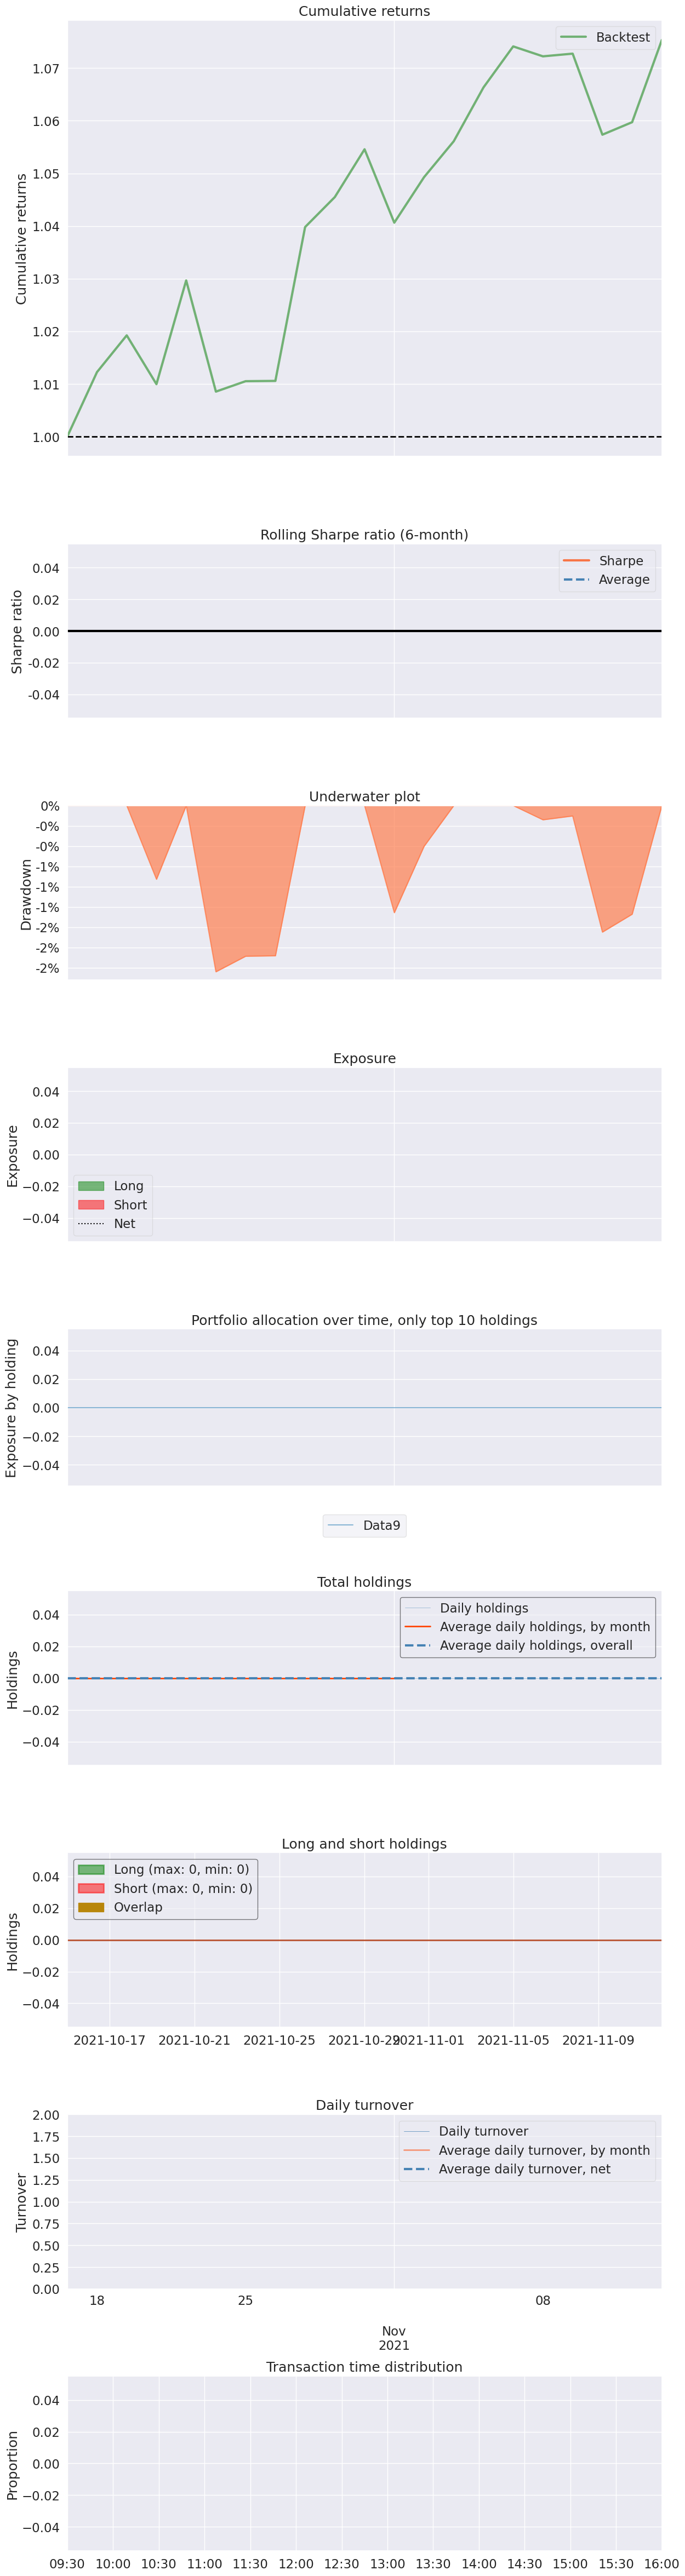

In [114]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'COVID_sentiment', end_date, top_n)
#print(ranked_companies.index.tolist())

# 2. Portfolio Optimization

selected_tickers = [company for company in ranked_companies.keys()]

print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, 10)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## ESG Sentiment Single Factor Views One Month Backtest

Selected tickers: ['RMS.PA', 'KO', 'KER.PA', 'F', 'ACN', 'GM', 'PYPL', 'HD', 'CVS', 'BNC.L']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('RMS.PA', 0.39882), ('KO', 0.44192), ('KER.PA', 0.0), ('F', 0.0), ('ACN', 0.0), ('GM', 0.0), ('PYPL', 0.1306), ('HD', 0.02866), ('CVS', 0.0), ('BNC.L', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 105060.29817604828,
 'sharpe_ratio': None,
 'max_drawdown': 1.8778224150522185,
 'cumulative_returns': 0.050602981760481835}

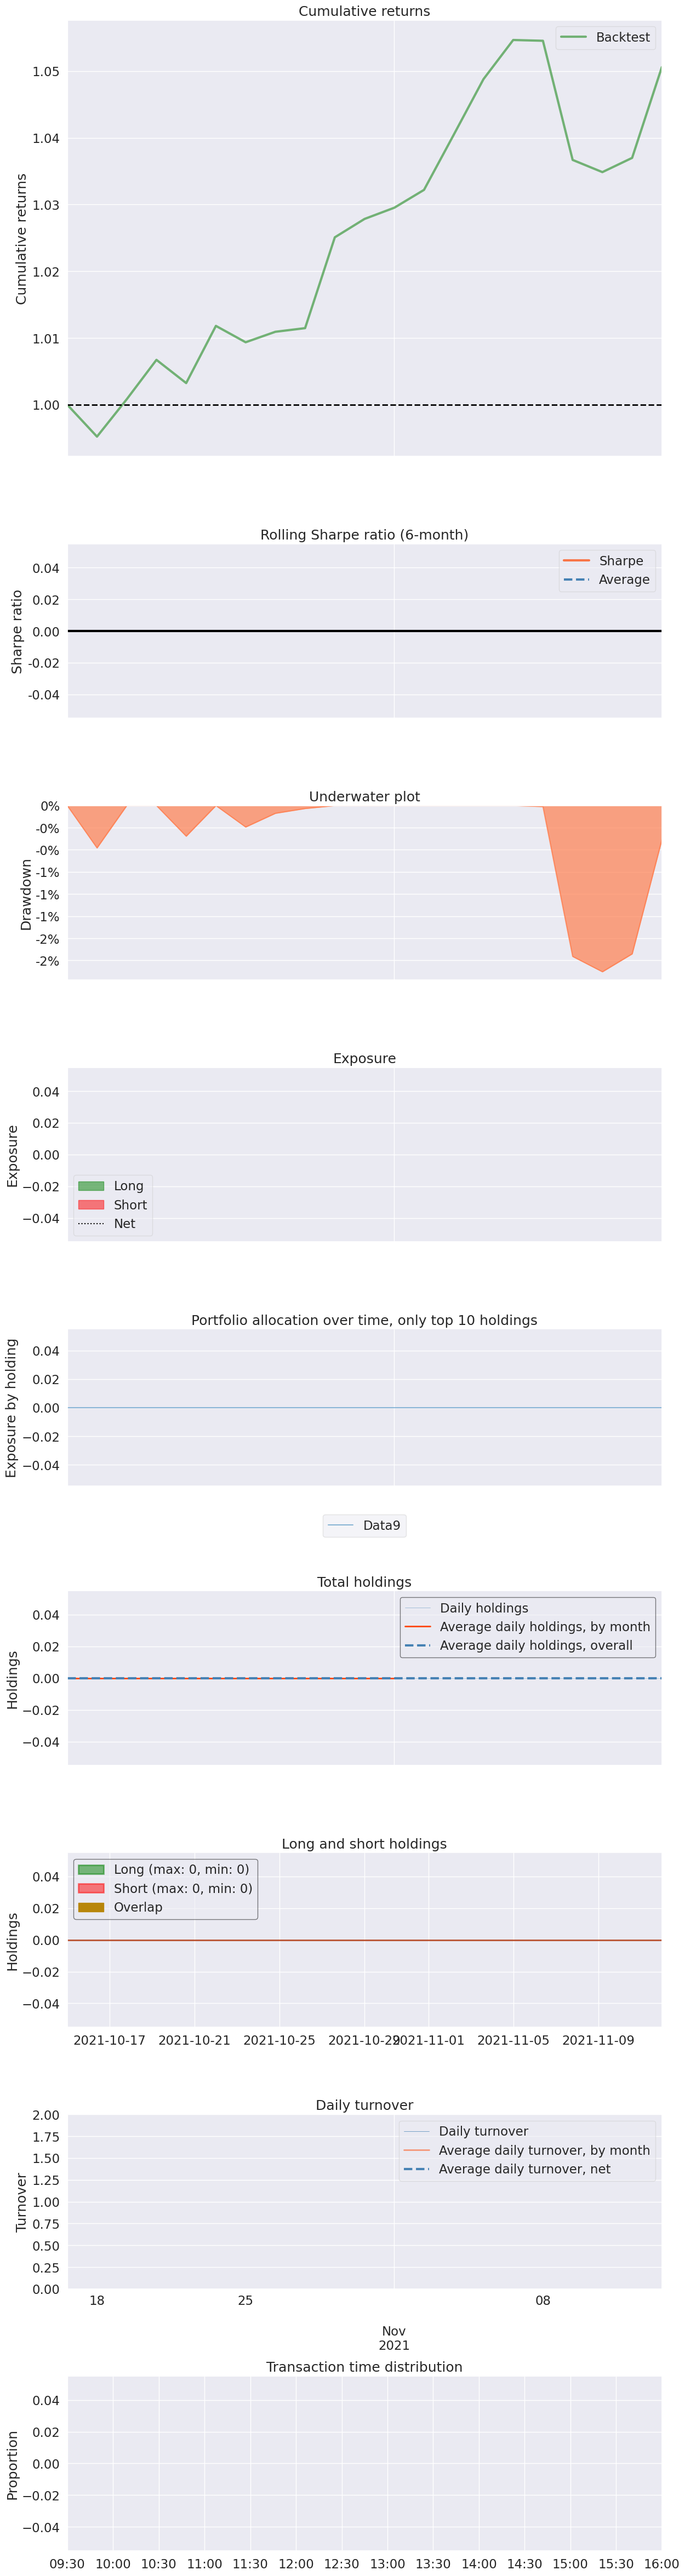

In [200]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'ESG News Sentiment ES Positive', end_date, top_n)
#print(ranked_companies.index.tolist())

# 2. Portfolio Optimization

selected_tickers = [company for company in ranked_companies.keys()]

print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, 10)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## News Sentiment Single Factor Views One Month Backtest

Selected tickers: ['HPQ', 'SAP', 'SBUX', 'NFLX', 'COST', 'DIS', 'AXP', 'BNC.L', 'HYMTF', 'ADDYY']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.0), ('SAP', 0.08732), ('SBUX', 0.03392), ('NFLX', 0.30622), ('COST', 0.17805), ('DIS', 0.30708), ('AXP', 0.0), ('BNC.L', 0.03223), ('HYMTF', 0.05517), ('ADDYY', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 102321.5488303833,
 'sharpe_ratio': None,
 'max_drawdown': 2.5774546562157052,
 'cumulative_returns': 0.02321548830383313}

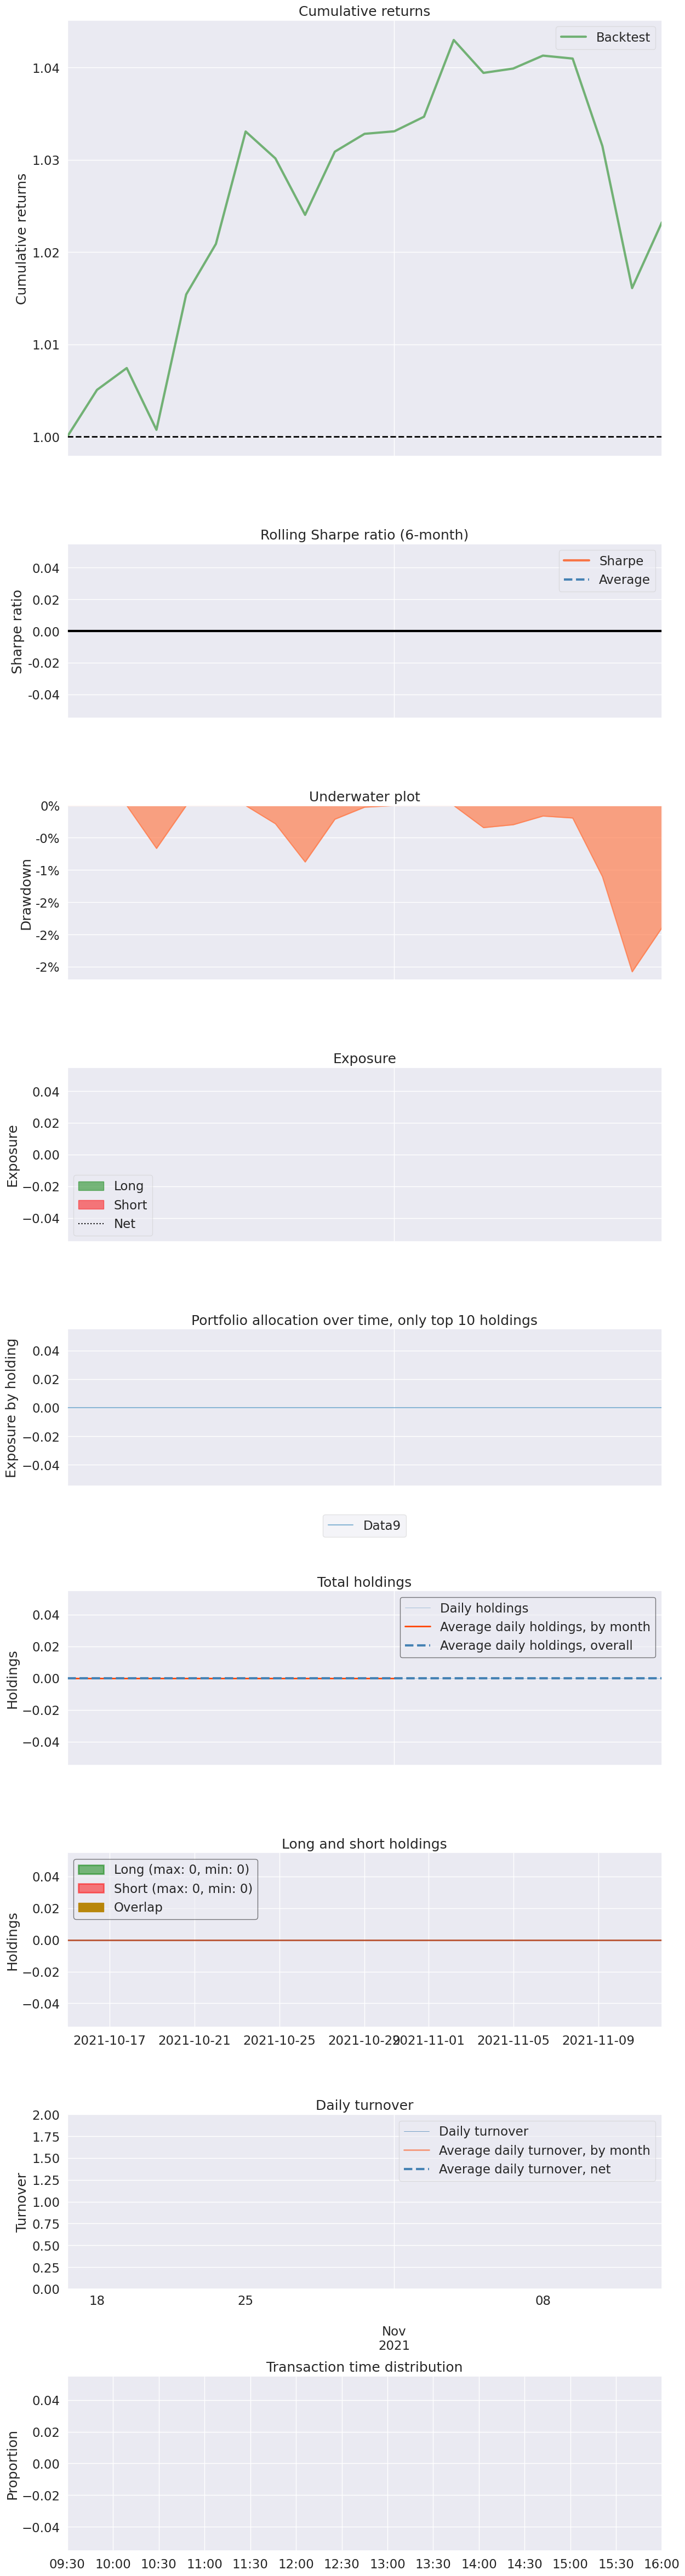

In [193]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'News Sentiment - Daily Average', end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## Twitter Sentiment Single Factor Model One Month Backtest

Selected tickers: ['CS.PA', 'QSR', 'IDEXF', 'HYMTF', 'DIS', 'EBAY', 'SAP', 'TMUS', 'ADBE', 'AMZN']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('CS.PA', 0.16844), ('QSR', 0.0), ('IDEXF', 0.02137), ('HYMTF', 0.01664), ('DIS', 0.0), ('EBAY', 0.0), ('SAP', 0.0), ('TMUS', 0.0), ('ADBE', 0.0), ('AMZN', 0.79355)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 104467.01468692398,
 'sharpe_ratio': None,
 'max_drawdown': 2.9510806690553593,
 'cumulative_returns': 0.04467014686924009}

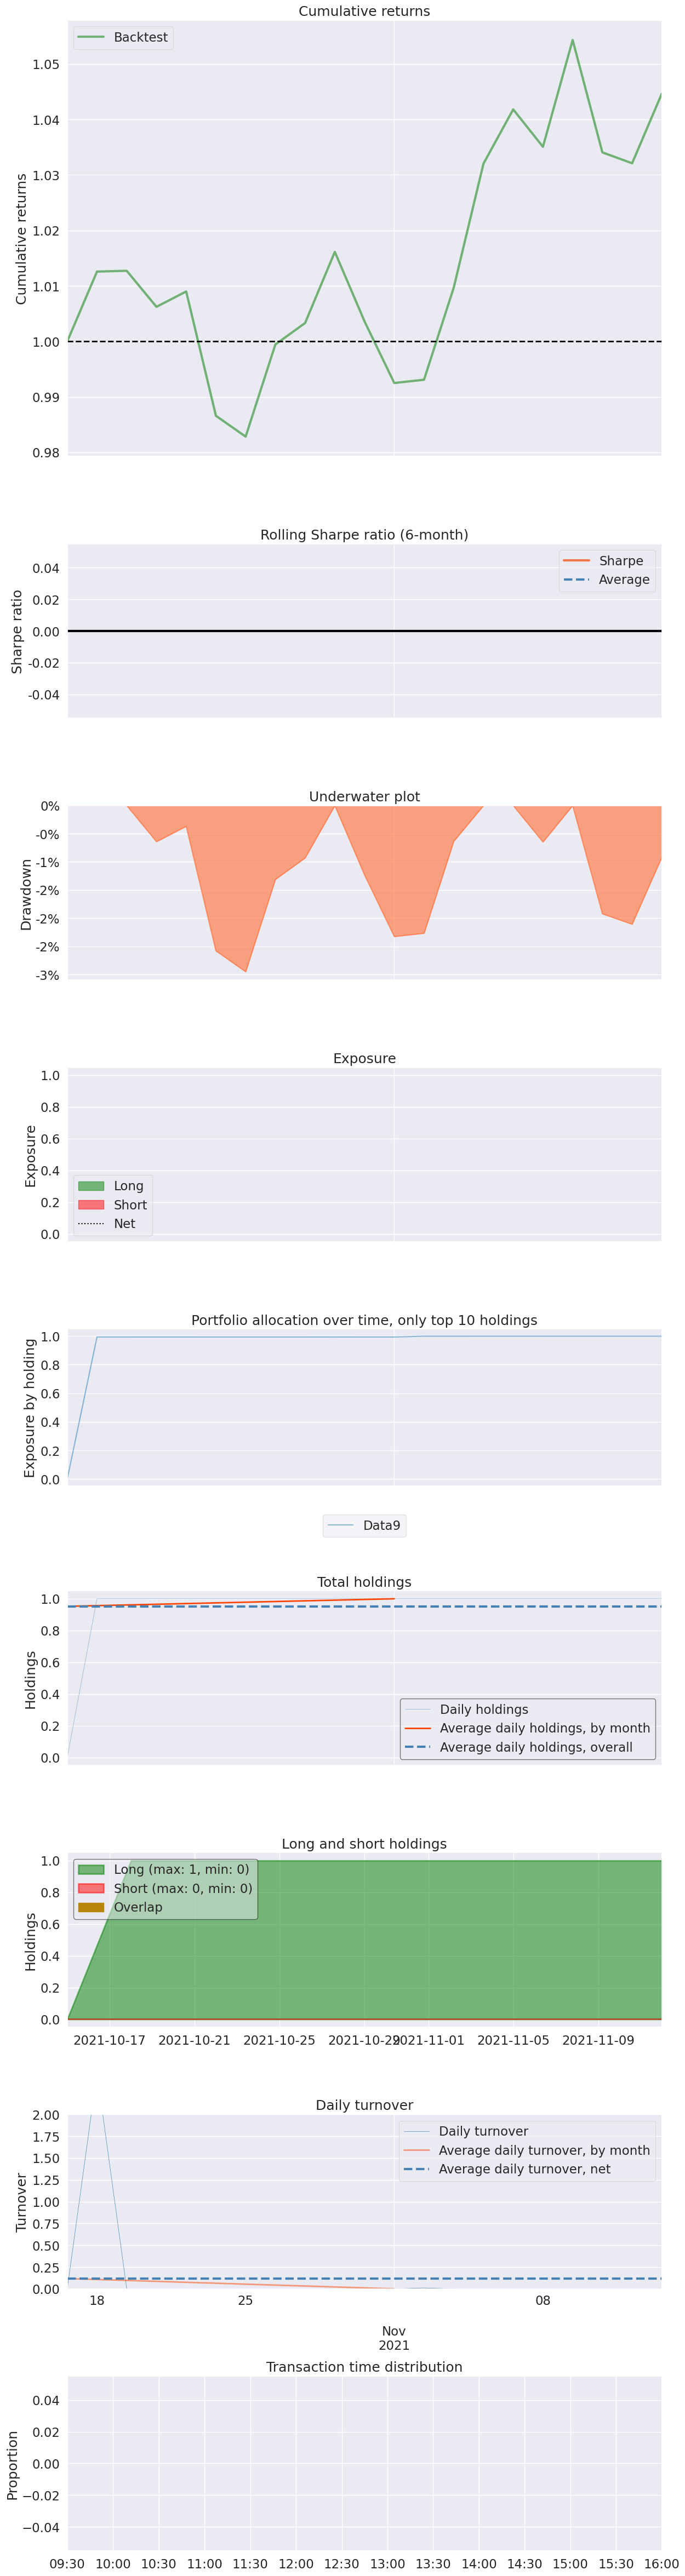

In [194]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'Twitter Sentiment Daily Average', end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

# Assuming market_caps is previously defined...
weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## Multi-Factor Sentiment View One Month Backtest

Selected tickers: ['HPQ', 'BAC', 'CS.PA', 'KO', 'F', 'RMS.PA', 'HYMTF', 'JPM', 'COST', 'SBUX']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.14821), ('BAC', 0.0), ('CS.PA', 0.10277), ('KO', 0.26297), ('F', 0.0), ('RMS.PA', 0.22233), ('HYMTF', 0.02081), ('JPM', 0.15119), ('COST', 0.09173), ('SBUX', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 108489.9391206093,
 'sharpe_ratio': None,
 'max_drawdown': 0.8139665843138888,
 'cumulative_returns': 0.08489939120609269}

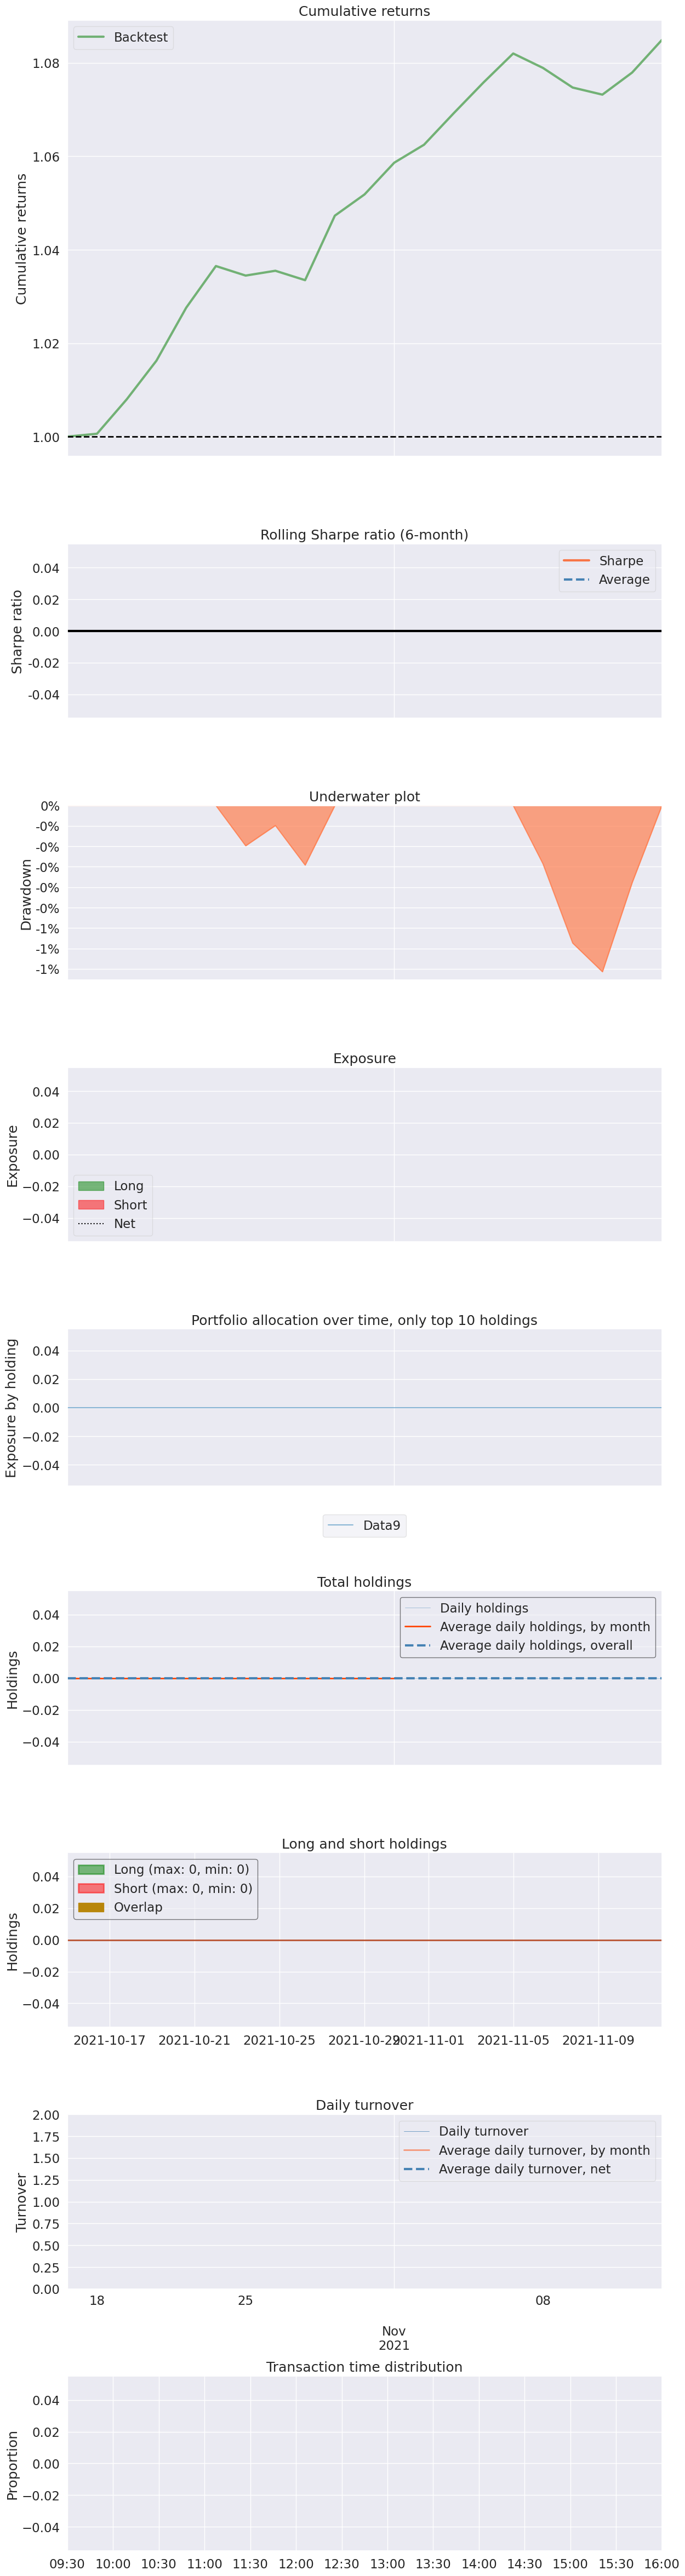

In [199]:
sentiment_factors = ['COVID_sentiment', 'News Sentiment - Daily Average', 'ESG News Sentiment ES Positive', 'Twitter Sentiment Daily Average']
ranked_companies = rank_companies_by_sentiments(data, sentiment_factors, '2021-10-15')

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

# Assuming market_caps is previously defined...
weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2021, 11, 15)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## RF Views One Year Market Fall Backtest (Can be run with usable_data.csv)

{'V': 0.020872179054359733, 'GOOG': 0.06568694813680973, 'BAC': 0.07061179353041096, 'UBS': 0.05047124904095375, 'AMZN': 0.021590092021387907, 'WFC': 0.03151439481856959, 'HPQ': 0.0648335601391491, 'HMC': -0.04119021474417577, 'DANOY': 0.0062507616183241, 'DIS': 0.015619735764879397, 'WMT': 0.013060729586353254, 'UPS': 0.09091764100112894, 'SAP': 0.018253290278952707, 'AAPL': -0.025184389105173847, 'GM': 0.0006099489464964431, 'T': -0.01939831156992694, 'F': -0.009725992587494015, 'C': -0.22573597480856125, 'KO': 0.08785803071243654, 'SIE.DE': 0.020931290910350238, 'META': 0.02312040707387611, 'CS.PA': 0.009147835588632483, 'INTC': 0.016540583477126974, 'VOW.DE': -0.06926701100022234, 'NTDOY': 0.03328187939767509, 'FDX': 0.022454137143857758, 'CSCO': 0.020738071034103855, 'FOX': -0.05587700554226415, 'COST': 0.027824263801182757, 'CVS': -0.007435363701011923, 'NFLX': 0.020684920844262673, 'MSFT': 0.022584837800871012, 'HD': 0.018111386426131793, 'MCD': 0.017544624701239568, 'TMUS': 0.0

/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


OrderedDict([('PM', 0.0), ('BAC', 0.0), ('GOOG', 0.49115), ('ACN', 0.0), ('COST', 0.0), ('KO', 0.3309), ('MSFT', 0.1741), ('HPQ', 0.0), ('NTDOY', 0.0), ('LRLCF', 0.00385)])
['PM', 'BAC', 'GOOG', 'ACN', 'COST', 'KO', 'MSFT', 'HPQ', 'NTDOY', 'LRLCF']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 81630.31478881455,
 'sharpe_ratio': -0.6602144942779425,
 'max_drawdown': 23.90642283055719,
 'cumulative_returns': -0.1836968521118535}

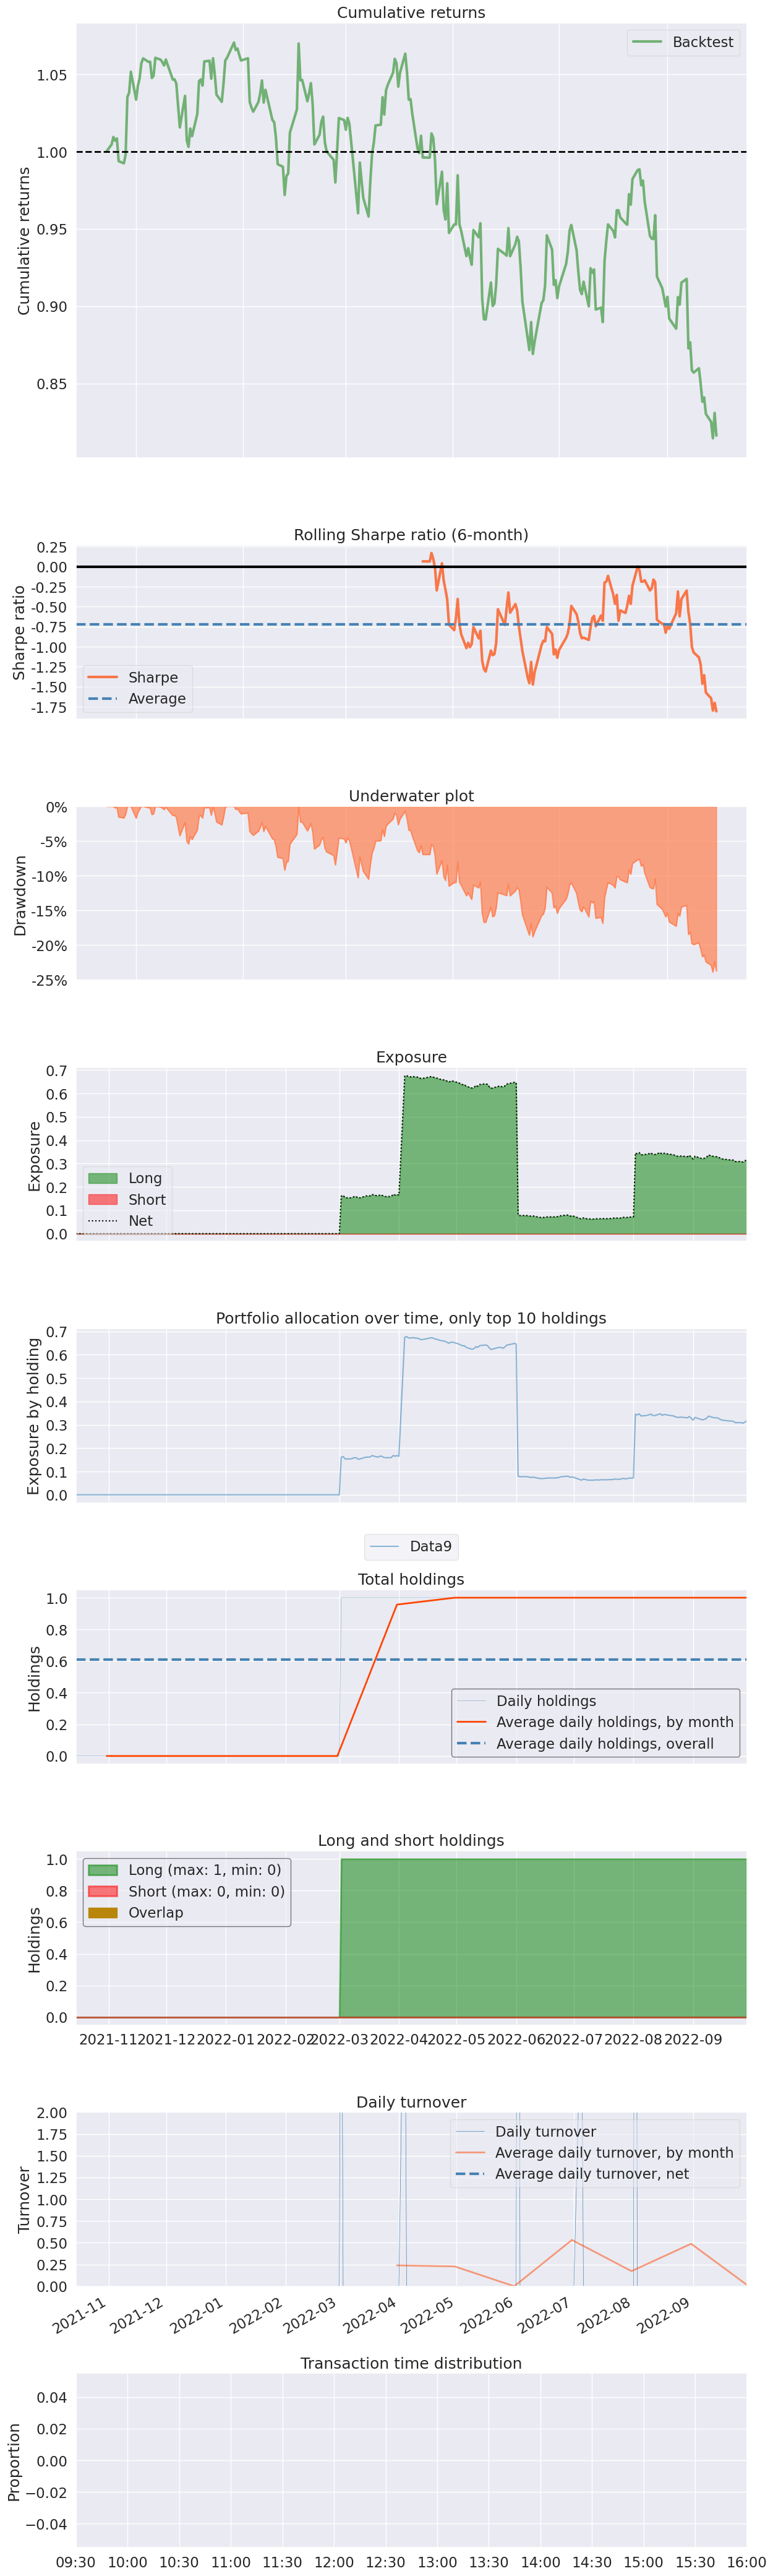

In [323]:
# Running the Random Forest to obtain view predictions
financial_features = ['Basic Earnings per Share', 'Last Price', 'Open Price', 'Volatility 10 Day', 
                          'Volatility 30 Day', 'Volatility 90 Day', 'Volume', 'Price Earnings Ratio (P/E)', 
                          'Return on Common Equity', 'Total Debt to Total Equity']

covid_features = ['Comments Count', 'Average_Comment_Score', 'COVID_sentiment']
features = financial_features + covid_features
results, model, test_data = run_random_forest_regressor(features, df)
target_date = datetime(2021, 10, 15)

# obtaining most recent dated prediction for each company
views = get_view_on_date(test_data, target_date)
print(views)

metrics, trained_model, test_data_set = run_random_forest(features, 30, 50, 9, 8) 

# Predicting companies
specific_date = pd.Timestamp('2021-10-15')
predicted_companies = rank_predicted_companies(trained_model, test_data_set, features, specific_date)

# Selecting top 20 companies based on probability
top_10_companies = predicted_companies[:10]

# Map company names to tickers
selected_tickers = [name_to_ticker[company[0]] for company in top_10_companies]

#views = {ticker: views[ticker] for ticker in selected_tickers if ticker in views}
views = {ticker: views[ticker] if ticker in views else 0 for ticker in selected_tickers}

weights = optimize_portfolio(selected_tickers, market_caps, views, top_n=10)
print(weights)
print(selected_tickers)

start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)

## COVID Sentiment Single Factor Views One Year Market Fall Backtest (Can be run with usable_data.csv)

Selected tickers: ['HPQ', 'BAC', 'F', 'HYMTF', 'CS.PA', 'JPM', 'GOOG', 'V', 'COST', 'ADDYY']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.25791), ('BAC', 0.0248), ('F', 0.0), ('HYMTF', 0.01571), ('CS.PA', 0.0), ('JPM', 0.0), ('GOOG', 0.70157), ('V', 0.0), ('COST', 0.0), ('ADDYY', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 75353.65856867218,
 'sharpe_ratio': -0.5723862267811852,
 'max_drawdown': 32.816383093850895,
 'cumulative_returns': -0.24646341431327745}

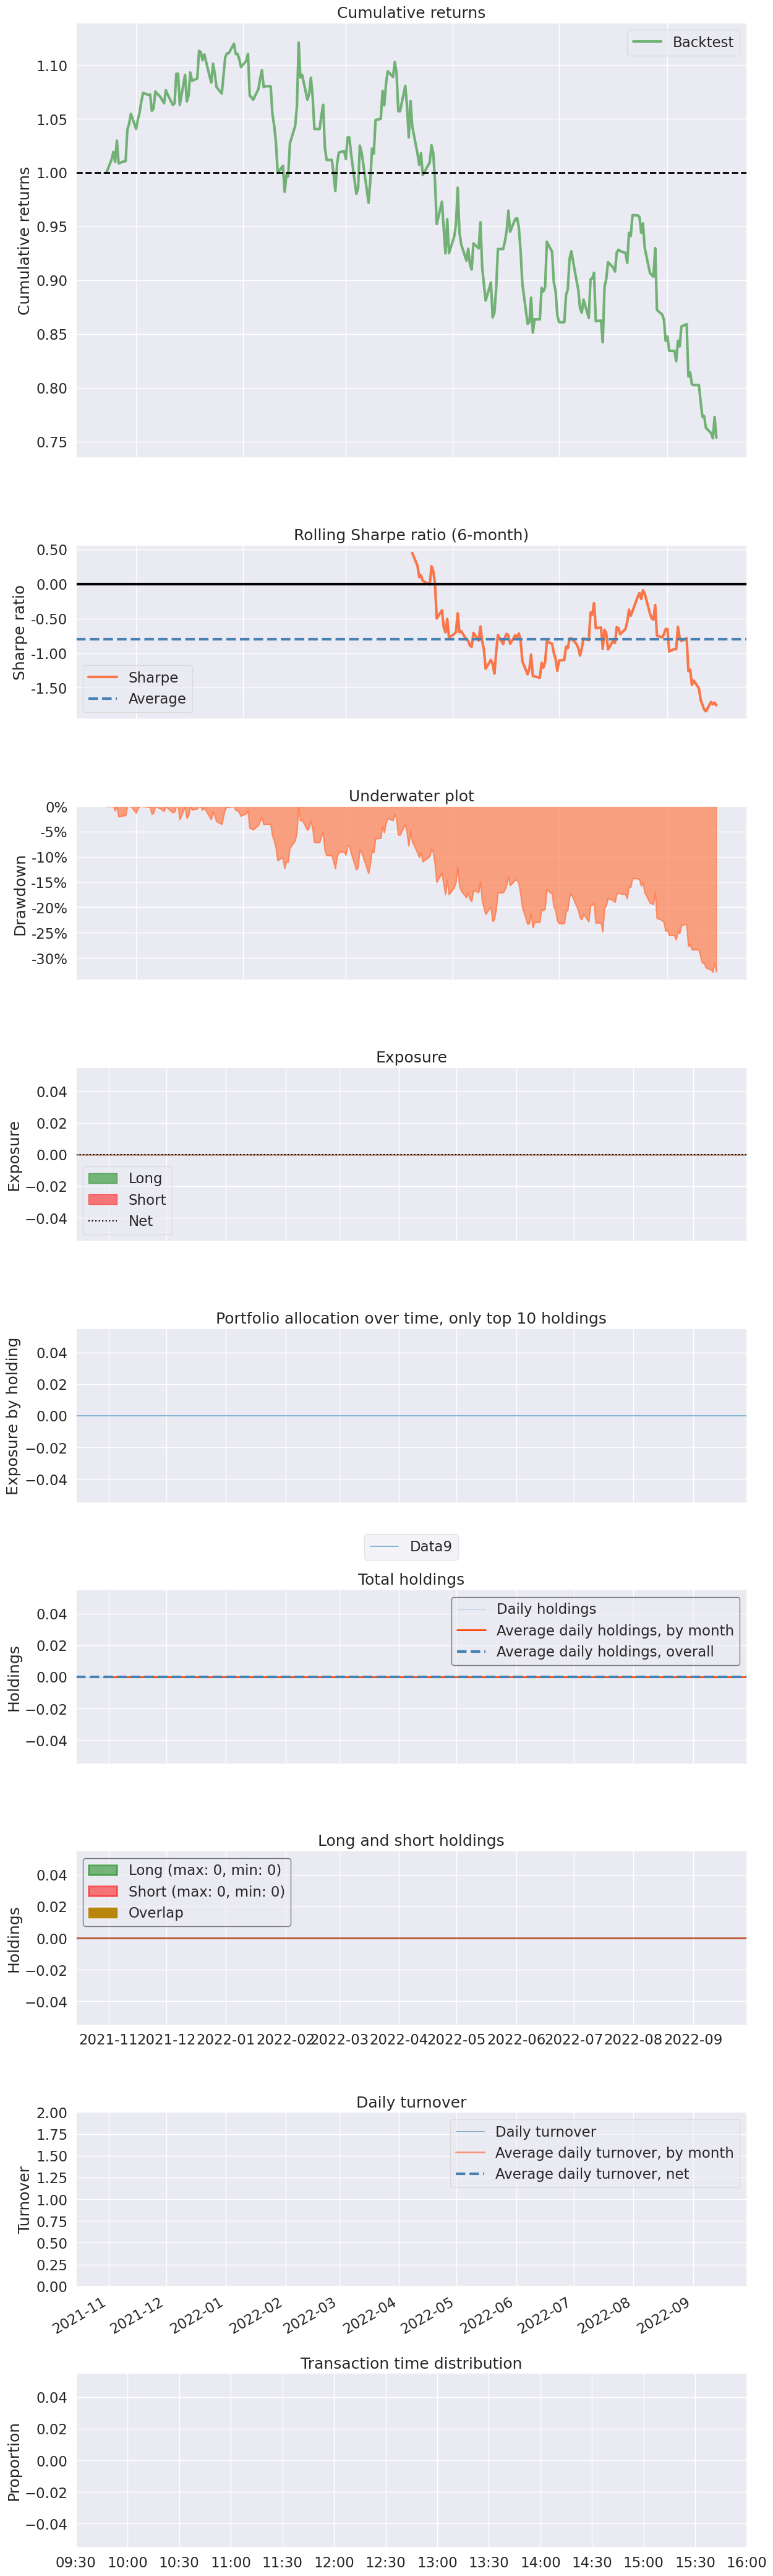

In [115]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'COVID_sentiment', end_date, top_n)
#print(ranked_companies.index.tolist())

# 2. Portfolio Optimization

selected_tickers = [company for company in ranked_companies.keys()]

print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, 10)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## ESG Sentiment Single Factor Views One Year Market Fall Backtest

Selected tickers: ['RMS.PA', 'KO', 'KER.PA', 'F', 'ACN', 'GM', 'PYPL', 'HD', 'CVS', 'BNC.L']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('RMS.PA', 0.39882), ('KO', 0.44192), ('KER.PA', 0.0), ('F', 0.0), ('ACN', 0.0), ('GM', 0.0), ('PYPL', 0.1306), ('HD', 0.02866), ('CVS', 0.0), ('BNC.L', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 90635.08295587539,
 'sharpe_ratio': -0.3719772696451862,
 'max_drawdown': 27.128469143911815,
 'cumulative_returns': -0.09364917044124688}

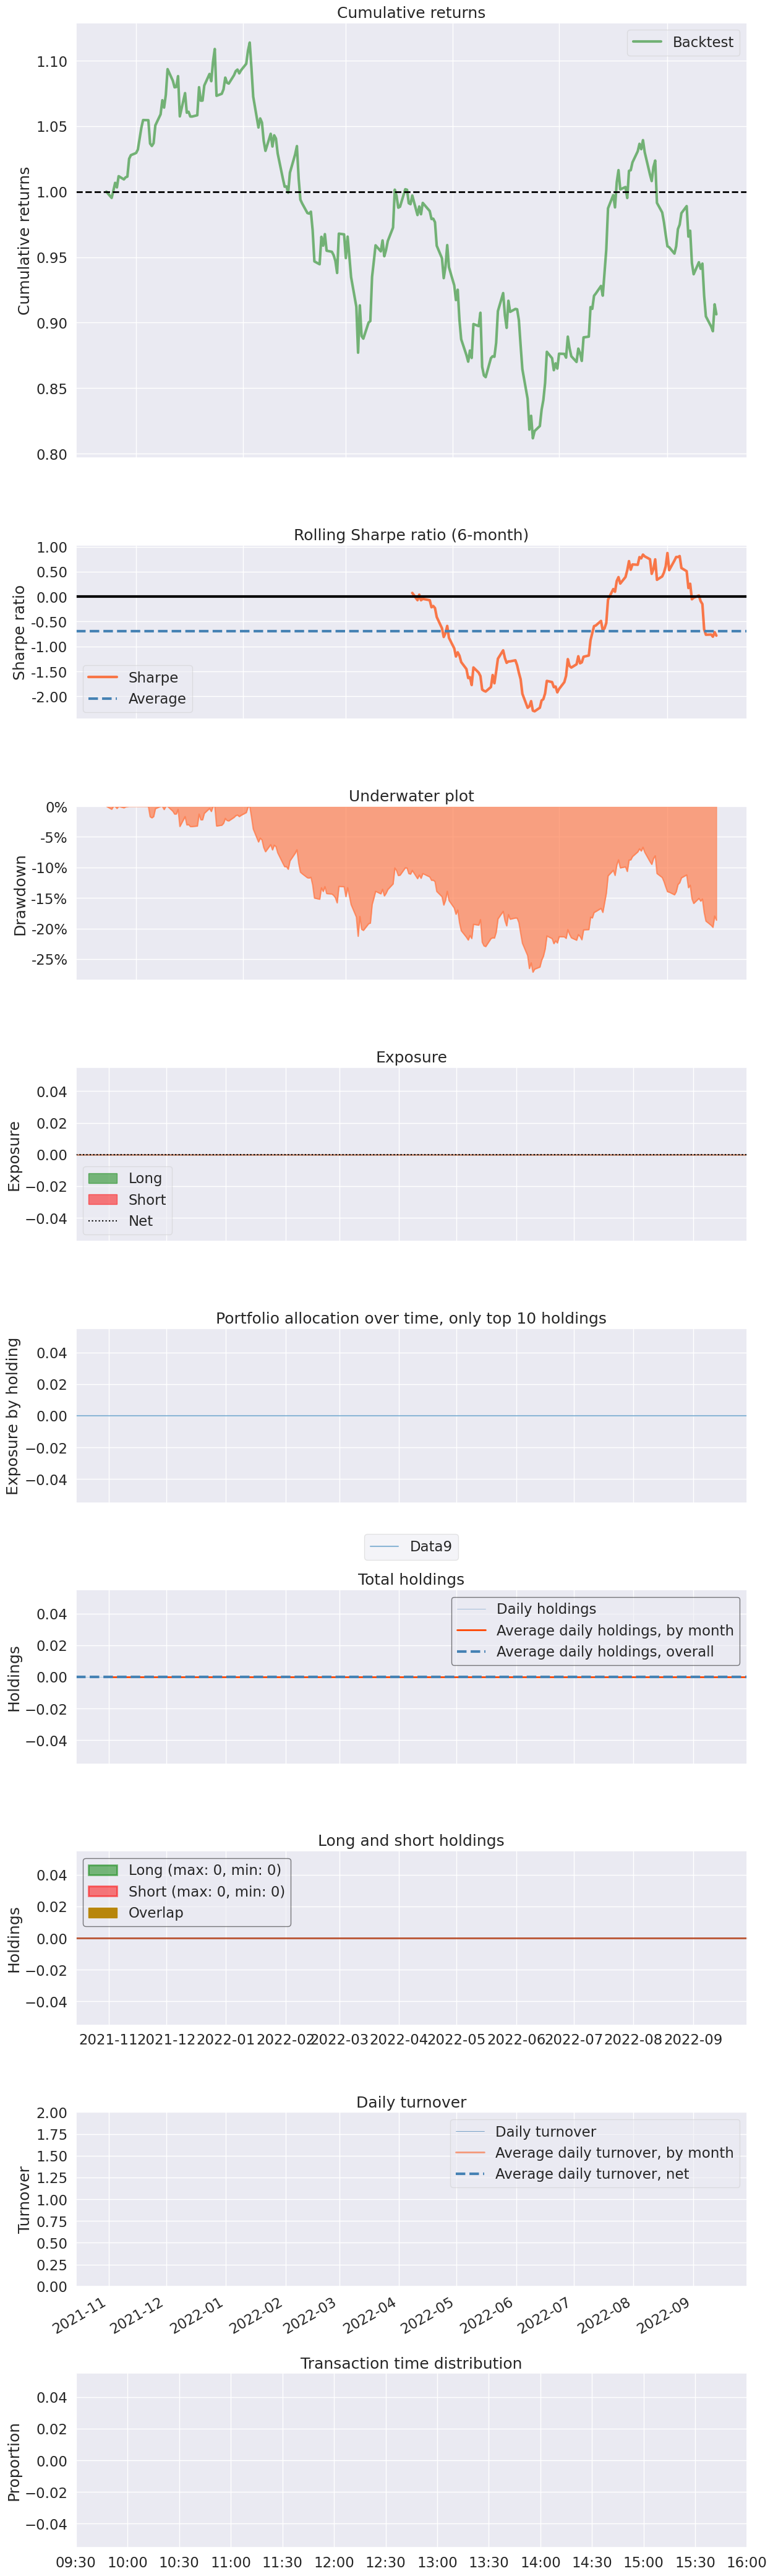

In [203]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'ESG News Sentiment ES Positive', end_date, top_n)
#print(ranked_companies.index.tolist())

# 2. Portfolio Optimization

selected_tickers = [company for company in ranked_companies.keys()]

print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, 10)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## News Sentiment Single Factor Views One Year Market Fall Backtest

Selected tickers: ['HPQ', 'SAP', 'SBUX', 'NFLX', 'COST', 'DIS', 'AXP', 'BNC.L', 'HYMTF', 'ADDYY']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.0), ('SAP', 0.08732), ('SBUX', 0.03392), ('NFLX', 0.30622), ('COST', 0.17805), ('DIS', 0.30708), ('AXP', 0.0), ('BNC.L', 0.03223), ('HYMTF', 0.05517), ('ADDYY', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 61655.10076648712,
 'sharpe_ratio': -1.1023174535011642,
 'max_drawdown': 44.73023809174901,
 'cumulative_returns': -0.38344899233512797}

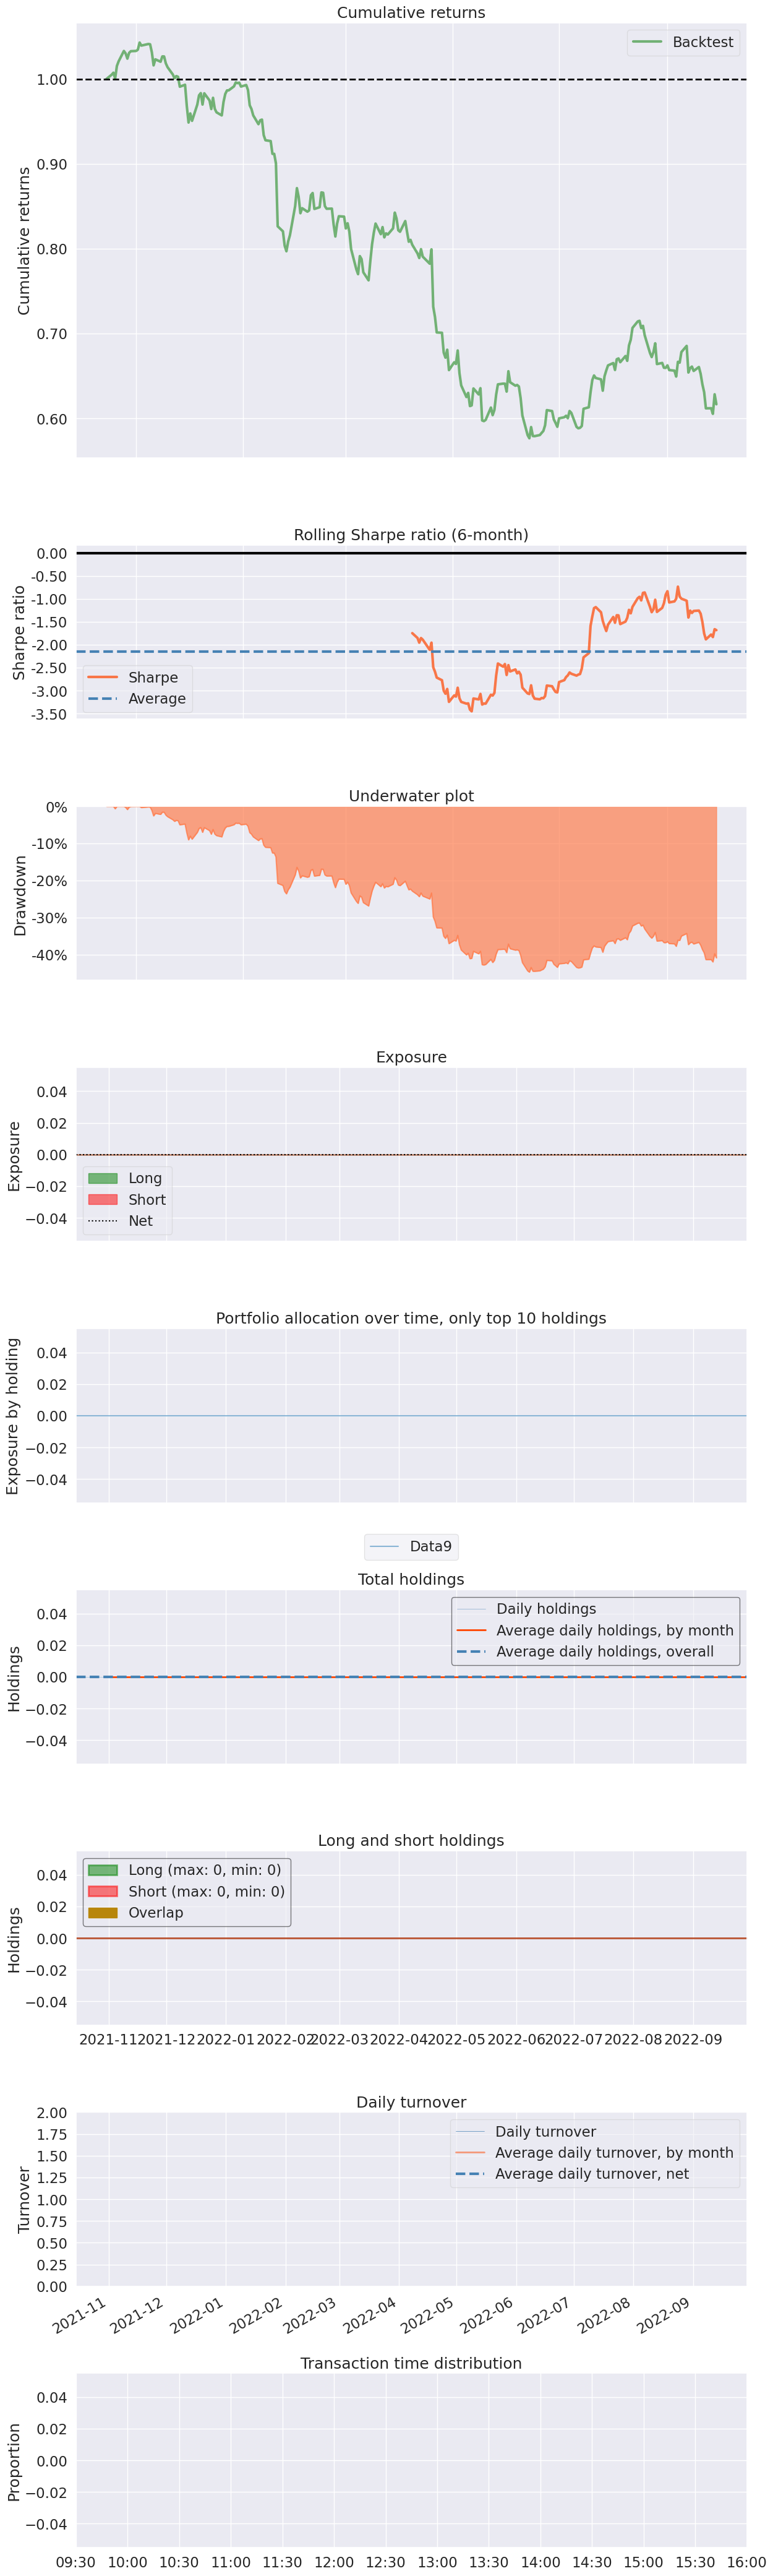

In [204]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'News Sentiment - Daily Average', end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## Twitter Sentiment Single Factor Views One Year Market Fall Backtest

Selected tickers: ['CS.PA', 'QSR', 'IDEXF', 'HYMTF', 'DIS', 'EBAY', 'SAP', 'TMUS', 'ADBE', 'AMZN']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('CS.PA', 0.16844), ('QSR', 0.0), ('IDEXF', 0.02137), ('HYMTF', 0.01664), ('DIS', 0.0), ('EBAY', 0.0), ('SAP', 0.0), ('TMUS', 0.0), ('ADBE', 0.0), ('AMZN', 0.79355)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 72482.09281552696,
 'sharpe_ratio': -1.0721923194892855,
 'max_drawdown': 38.69099033072633,
 'cumulative_returns': -0.27517907184473067}

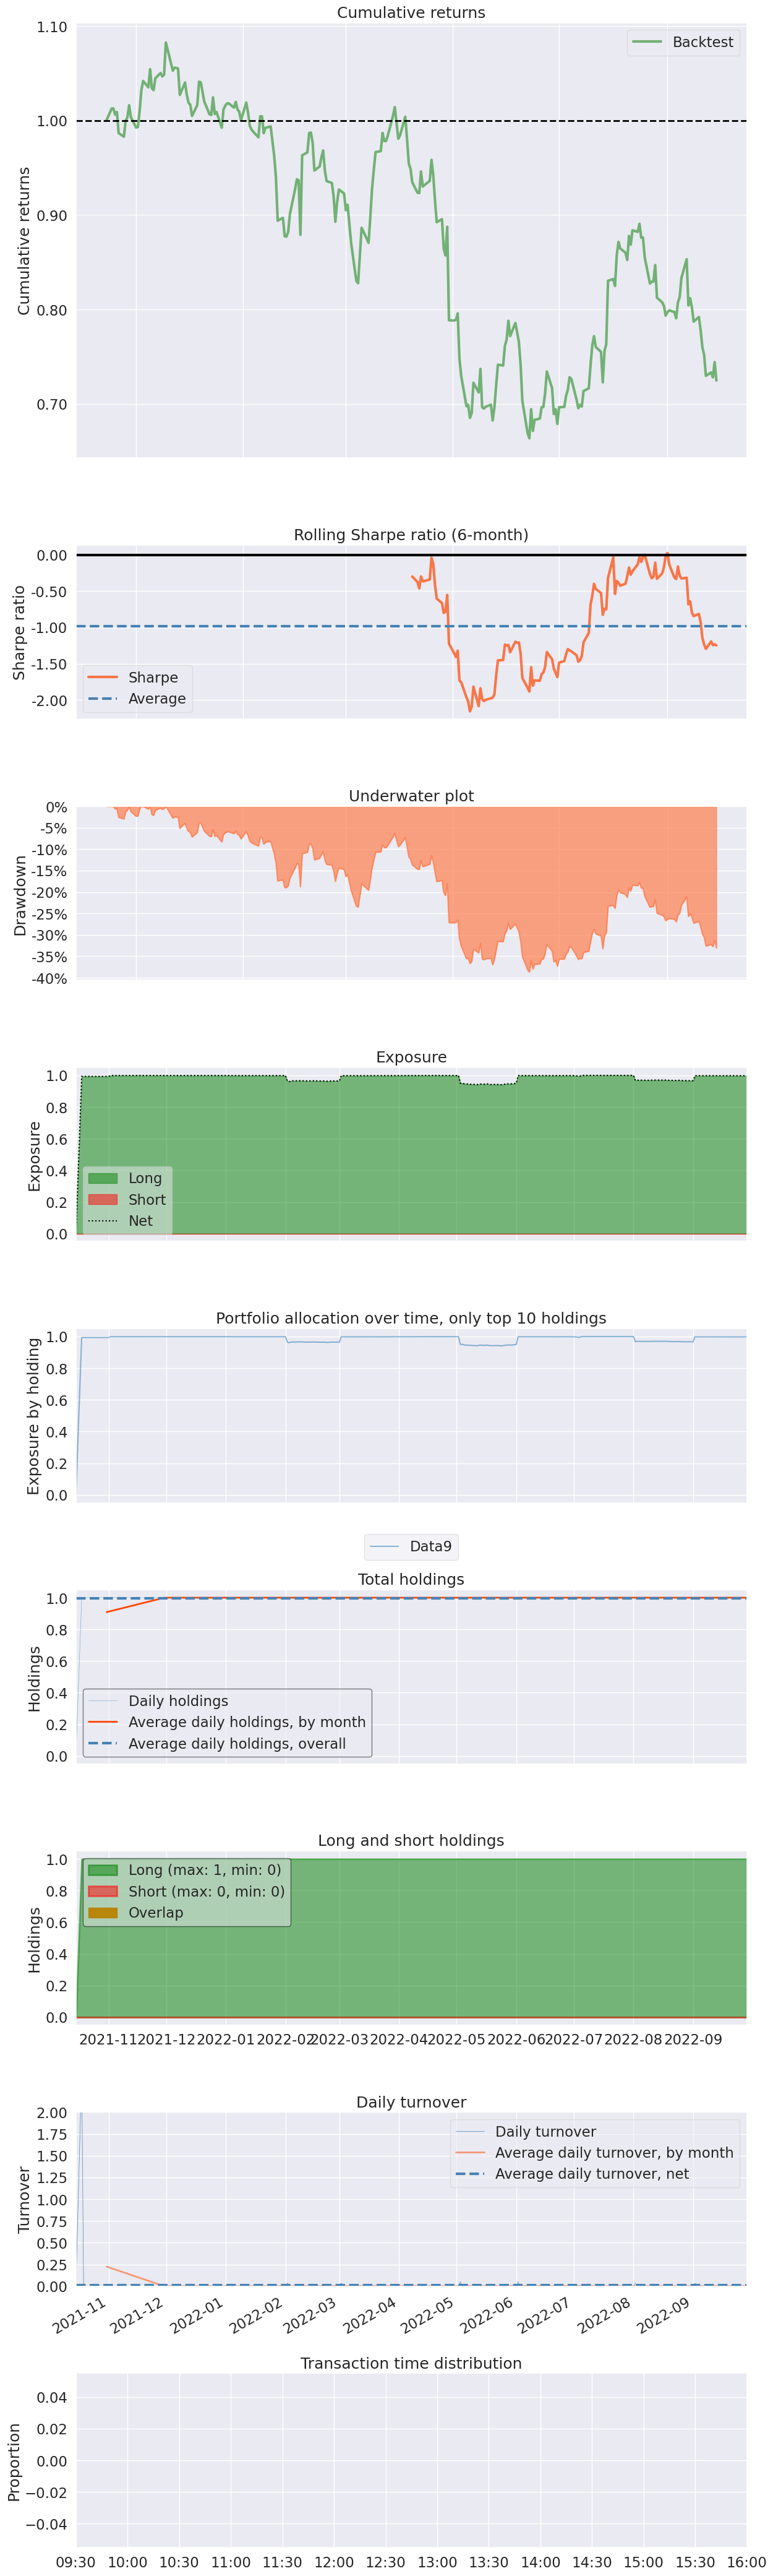

In [205]:
# 1. Sentiment Analysis and Ranking
data = df
end_date = '2021-10-15'
top_n = 10
ranked_companies = rank_companies_by_sentiment(data, 'Twitter Sentiment Daily Average', end_date, top_n)

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)


## Multi-Factor Factor Views One Year Market Fall Backtest

Selected tickers: ['HPQ', 'BAC', 'CS.PA', 'KO', 'F', 'RMS.PA', 'HYMTF', 'JPM', 'COST', 'SBUX']


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pypfopt/risk_models.py:167: RuntimeWarning: data is not in a dataframe
  warnings.warn("data is not in a dataframe", RuntimeWarning)


Black-Litterman Weights with Views: OrderedDict([('HPQ', 0.14821), ('BAC', 0.0), ('CS.PA', 0.10277), ('KO', 0.26297), ('F', 0.0), ('RMS.PA', 0.22233), ('HYMTF', 0.02081), ('JPM', 0.15119), ('COST', 0.09173), ('SBUX', 0.0)])


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


/Users/kirillsakharov/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


{'final_portfolio_value': 92689.83473147966,
 'sharpe_ratio': -0.20041955850920998,
 'max_drawdown': 20.942419323604394,
 'cumulative_returns': -0.07310165268520397}

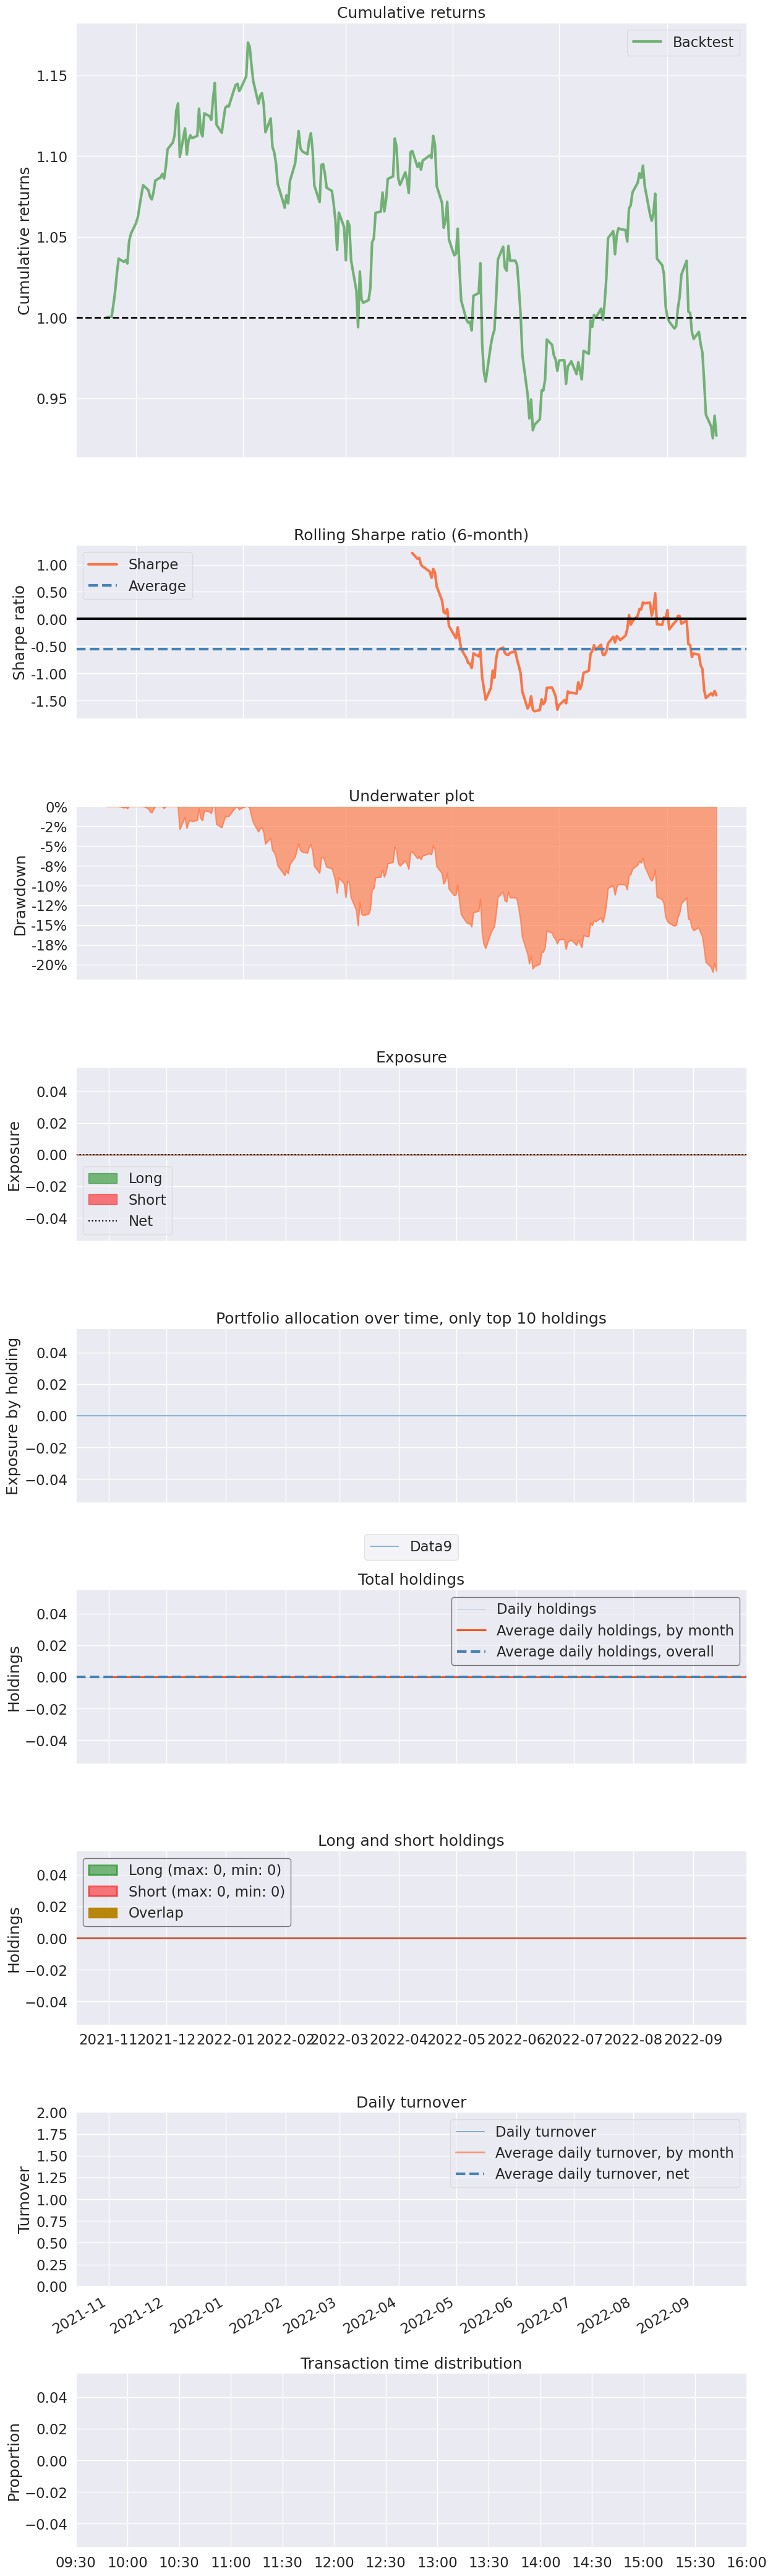

In [206]:
sentiment_factors = ['COVID_sentiment', 'News Sentiment - Daily Average', 'ESG News Sentiment ES Positive', 'Twitter Sentiment Daily Average']
ranked_companies = rank_companies_by_sentiments(data, sentiment_factors, '2021-10-15')

# 2. Portfolio Optimization
selected_tickers = [company for company in ranked_companies.keys()]
print("Selected tickers:", selected_tickers)

weights = optimize_portfolio(selected_tickers, market_caps, ranked_companies, top_n)
print("Black-Litterman Weights with Views:", weights)

# 3. Backtesting
start_date_backtest = datetime(2021, 10, 15)
end_date_backtest = datetime(2022, 9, 30)
run_backtest(selected_tickers, weights, start_date_backtest, end_date_backtest)
